In [461]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Simulator Results Analysis

In [472]:
# Load the data
with open('Simulator execution/simulator_data_df.pkl', 'rb') as f:
    simulator_data_df = pickle.load(f)

## Noise Plots

### Noise free Simulation

In [338]:
data = simulator_data_df

dfs = {}
dfs['ibm_brisbane'] = data[data['System'] == 'ibm_brisbane'][['N','T','Without Noise HF','Without Noise TV']]
dfs['ibm_kyoto'] = data[data['System'] == 'ibm_kyoto'][['N','T','Without Noise HF','Without Noise TV']]
dfs['ibm_sherbrooke'] = data[data['System'] == 'ibm_sherbrooke'][['N','T','Without Noise HF','Without Noise TV']]
dfs['ibm_nazca'] = data[data['System'] == 'ibm_nazca'][['N','T','Without Noise HF','Without Noise TV']]

systems = list(dfs.keys())

hf_heatmap_datas = {}
tv_heatmap_datas = {}

# Pivot the data to create a 2D heatmap
for system,df in dfs.items():
    hf_heatmap_data = df.pivot_table(index='N', columns='T', values='Without Noise HF').sort_values(by='N', ascending=False)
    tv_heatmap_data = df.pivot_table(index='N', columns='T', values='Without Noise TV').sort_values(by='N', ascending=False)
    hf_heatmap_datas[system] = hf_heatmap_data
    tv_heatmap_datas[system] = tv_heatmap_data

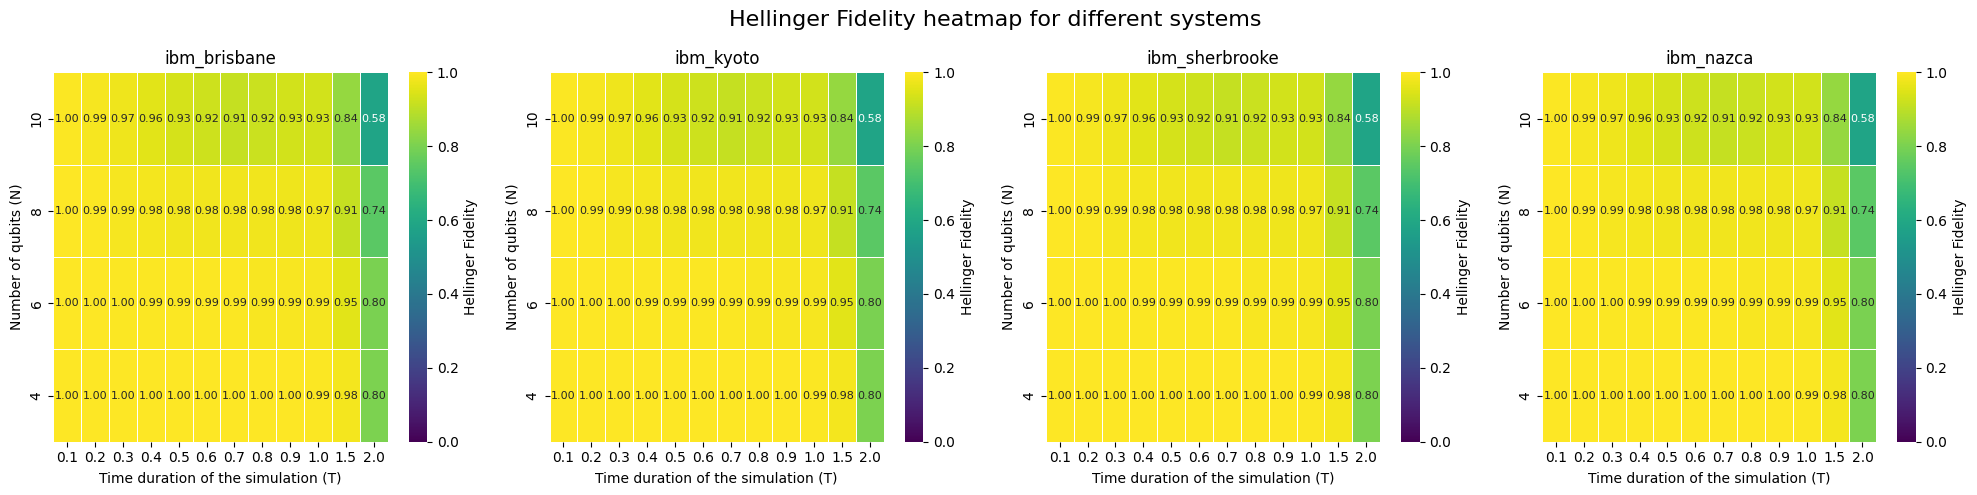

In [339]:
# Plot grid of 1x4 heatmaps
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    sns.heatmap(hf_heatmap_datas[systems[i]], 
                cmap='viridis', 
                linewidths=0.5, 
                annot=True, 
                fmt=".2f", 
                cbar_kws={'label': 'Hellinger Fidelity'}, 
                annot_kws={"size": 8}, 
                ax=ax,
                vmin=0, 
                vmax=1
                )
    
    ax.set_title(f'{systems[i]}')
    ax.set_xlabel('Time duration of the simulation (T)')
    ax.set_ylabel('Number of qubits (N)')

plt.suptitle('Hellinger Fidelity heatmap for different systems', fontsize=16)
plt.tight_layout()
plt.show()

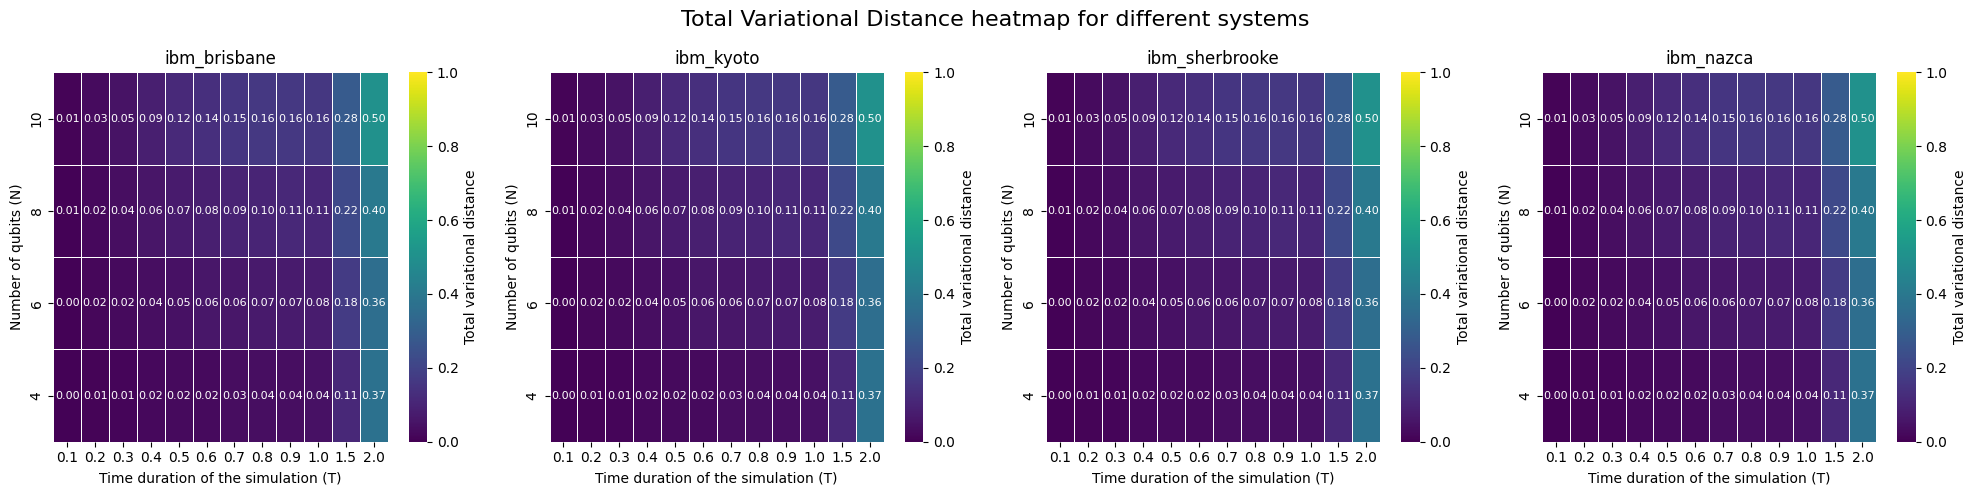

In [340]:
# Plot grid of 1x4 heatmaps
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    sns.heatmap(tv_heatmap_datas[systems[i]], 
                cmap='viridis', 
                linewidths=0.5, 
                annot=True, 
                fmt=".2f", 
                cbar_kws={'label': 'Total variational distance'}, 
                annot_kws={"size": 8}, ax=ax,
                vmin=0, 
                vmax=1
                )
    
    ax.set_title(f'{systems[i]}')
    ax.set_xlabel('Time duration of the simulation (T)')
    ax.set_ylabel('Number of qubits (N)')

plt.suptitle('Total Variational Distance heatmap for different systems', fontsize=16)
plt.tight_layout()
plt.show()

### Execution on Noisy Simulator

In [341]:
data = simulator_data_df

dfs = {}
dfs['ibm_brisbane'] = data[data['System'] == 'ibm_brisbane'][['N','T','Noise HF','Noise TV']]
dfs['ibm_kyoto'] = data[data['System'] == 'ibm_kyoto'][['N','T','Noise HF','Noise TV']]
dfs['ibm_sherbrooke'] = data[data['System'] == 'ibm_sherbrooke'][['N','T','Noise HF','Noise TV']]
dfs['ibm_nazca'] = data[data['System'] == 'ibm_nazca'][['N','T','Noise HF','Noise TV']]

systems = list(dfs.keys())

hf_heatmap_datas = {}
tv_heatmap_datas = {}

# Pivot the data to create a 2D heatmap
for system,df in dfs.items():
    hf_heatmap_data = df.pivot_table(index='N', columns='T', values='Noise HF').sort_values(by='N', ascending=False)
    tv_heatmap_data = df.pivot_table(index='N', columns='T', values='Noise TV').sort_values(by='N', ascending=False)
    hf_heatmap_datas[system] = hf_heatmap_data
    tv_heatmap_datas[system] = tv_heatmap_data

#### Hellinger Fidelity

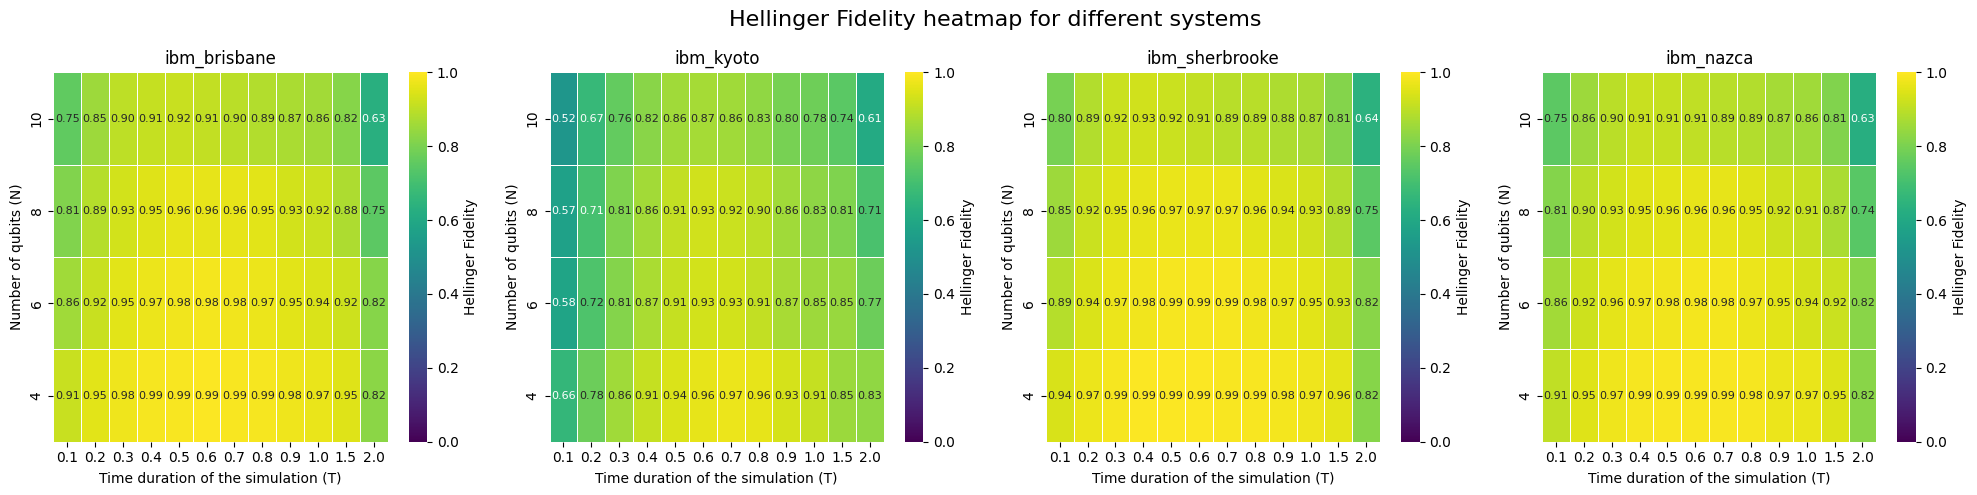

In [342]:
# Plot grid of 1x4 heatmaps
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    sns.heatmap(hf_heatmap_datas[systems[i]], 
                cmap='viridis', 
                linewidths=0.5, 
                annot=True, 
                fmt=".2f", 
                cbar_kws={'label': 'Hellinger Fidelity'}, 
                annot_kws={"size": 8}, 
                ax=ax,
                vmin=0, 
                vmax=1
                )
    
    ax.set_title(f'{systems[i]}')
    ax.set_xlabel('Time duration of the simulation (T)')
    ax.set_ylabel('Number of qubits (N)')

plt.suptitle('Hellinger Fidelity heatmap for different systems', fontsize=16)
plt.tight_layout()
plt.show()

#### Total Variational Distance

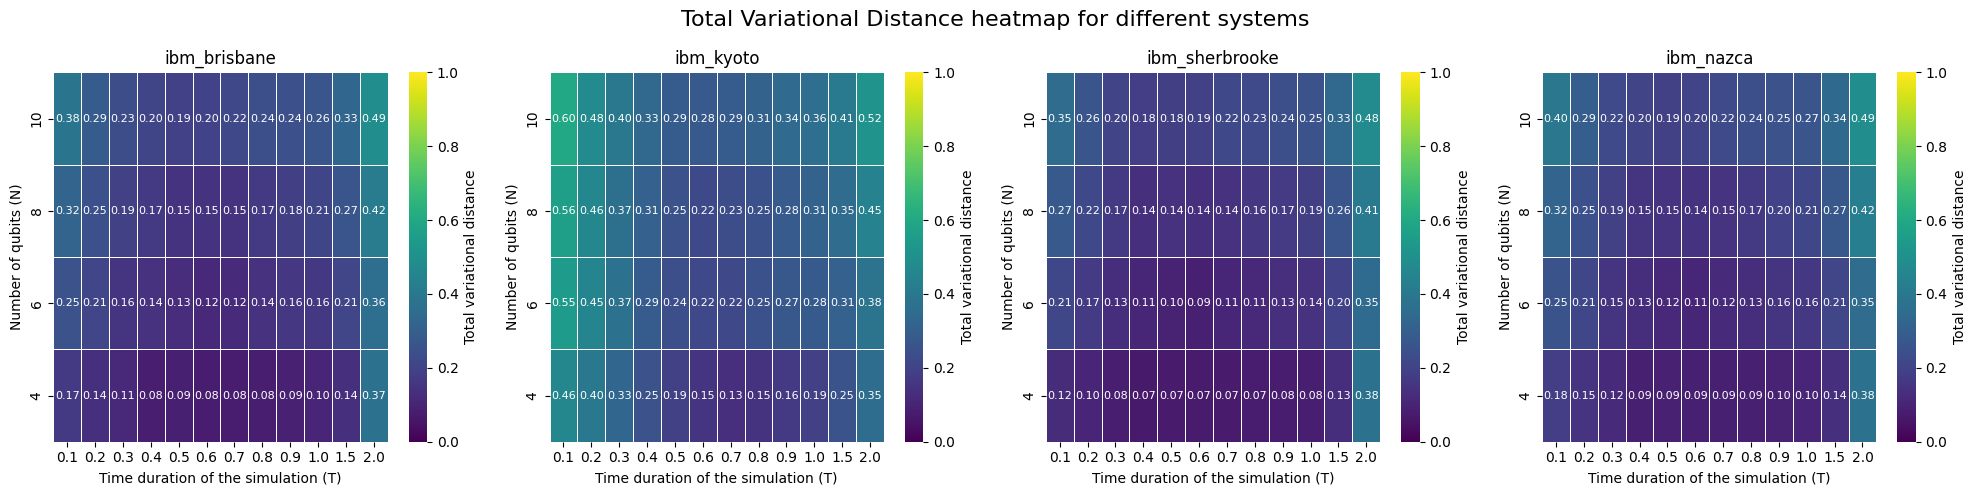

In [343]:
# Plot grid of 1x4 heatmaps
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    sns.heatmap(tv_heatmap_datas[systems[i]], 
                cmap='viridis', 
                linewidths=0.5, 
                annot=True, 
                fmt=".2f", 
                cbar_kws={'label': 'Total variational distance'}, 
                annot_kws={"size": 8}, ax=ax,
                vmin=0, 
                vmax=1
                )
    
    ax.set_title(f'{systems[i]}')
    ax.set_xlabel('Time duration of the simulation (T)')
    ax.set_ylabel('Number of qubits (N)')

plt.suptitle('Total Variational Distance heatmap for different systems', fontsize=16)
plt.tight_layout()
plt.show()

### Noise plot after ZNE mitigation

In [345]:
data = simulator_data_df

dfs = {}
dfs['ibm_brisbane'] = data[data['System'] == 'ibm_brisbane'][['N','T','ZNE HF','ZNE TV']]
dfs['ibm_kyoto'] = data[data['System'] == 'ibm_kyoto'][['N','T','ZNE HF','ZNE TV']]
dfs['ibm_sherbrooke'] = data[data['System'] == 'ibm_sherbrooke'][['N','T','ZNE HF','ZNE TV']]
dfs['ibm_nazca'] = data[data['System'] == 'ibm_nazca'][['N','T','ZNE HF','ZNE TV']]

systems = list(dfs.keys())

hf_heatmap_datas = {}
tv_heatmap_datas = {}

# Pivot the data to create a 2D heatmap
for system,df in dfs.items():
    hf_heatmap_data = df.pivot_table(index='N', columns='T', values='ZNE HF').sort_values(by='N', ascending=False)
    tv_heatmap_data = df.pivot_table(index='N', columns='T', values='ZNE TV').sort_values(by='N', ascending=False)
    hf_heatmap_datas[system] = hf_heatmap_data
    tv_heatmap_datas[system] = tv_heatmap_data

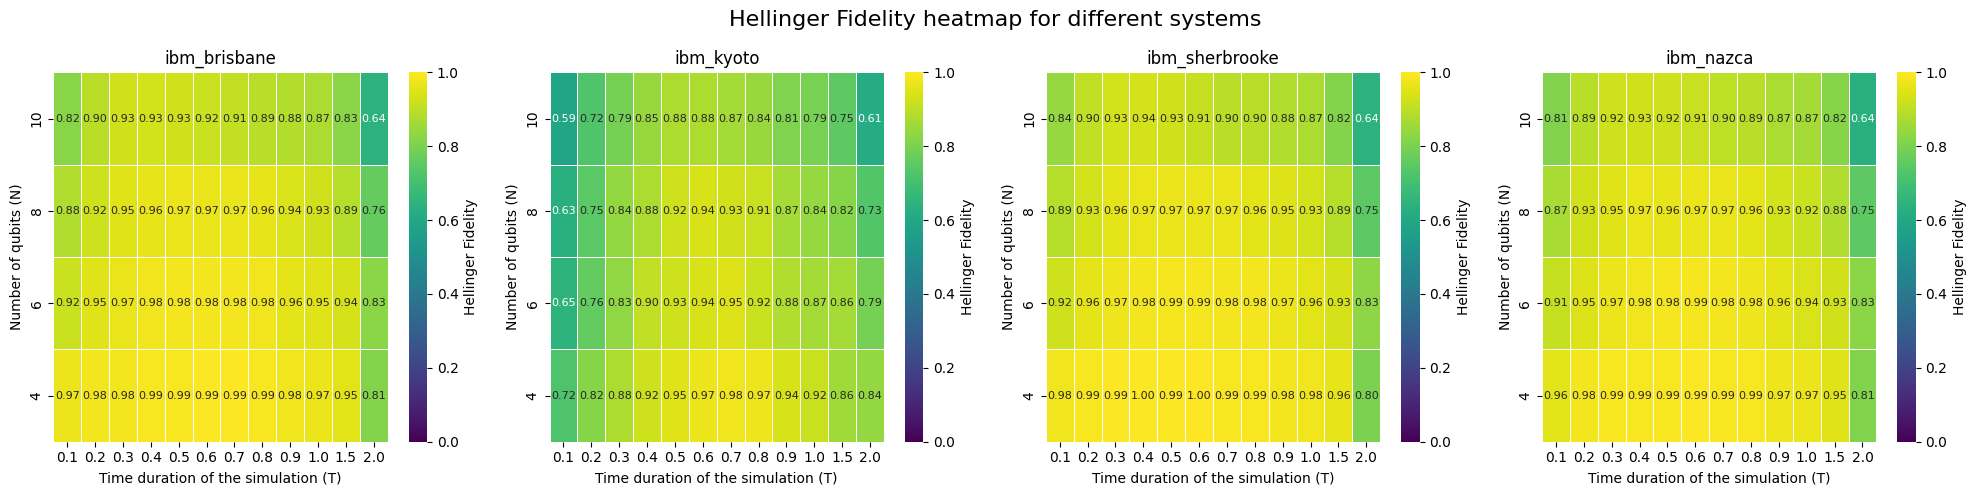

In [346]:
# Plot grid of 1x4 heatmaps
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    sns.heatmap(hf_heatmap_datas[systems[i]], 
                cmap='viridis', 
                linewidths=0.5, 
                annot=True, 
                fmt=".2f", 
                cbar_kws={'label': 'Hellinger Fidelity'}, 
                annot_kws={"size": 8}, 
                ax=ax,
                vmin=0, 
                vmax=1
                )
    
    ax.set_title(f'{systems[i]}')
    ax.set_xlabel('Time duration of the simulation (T)')
    ax.set_ylabel('Number of qubits (N)')

plt.suptitle('Hellinger Fidelity heatmap for different systems', fontsize=16)
plt.tight_layout()
plt.show()

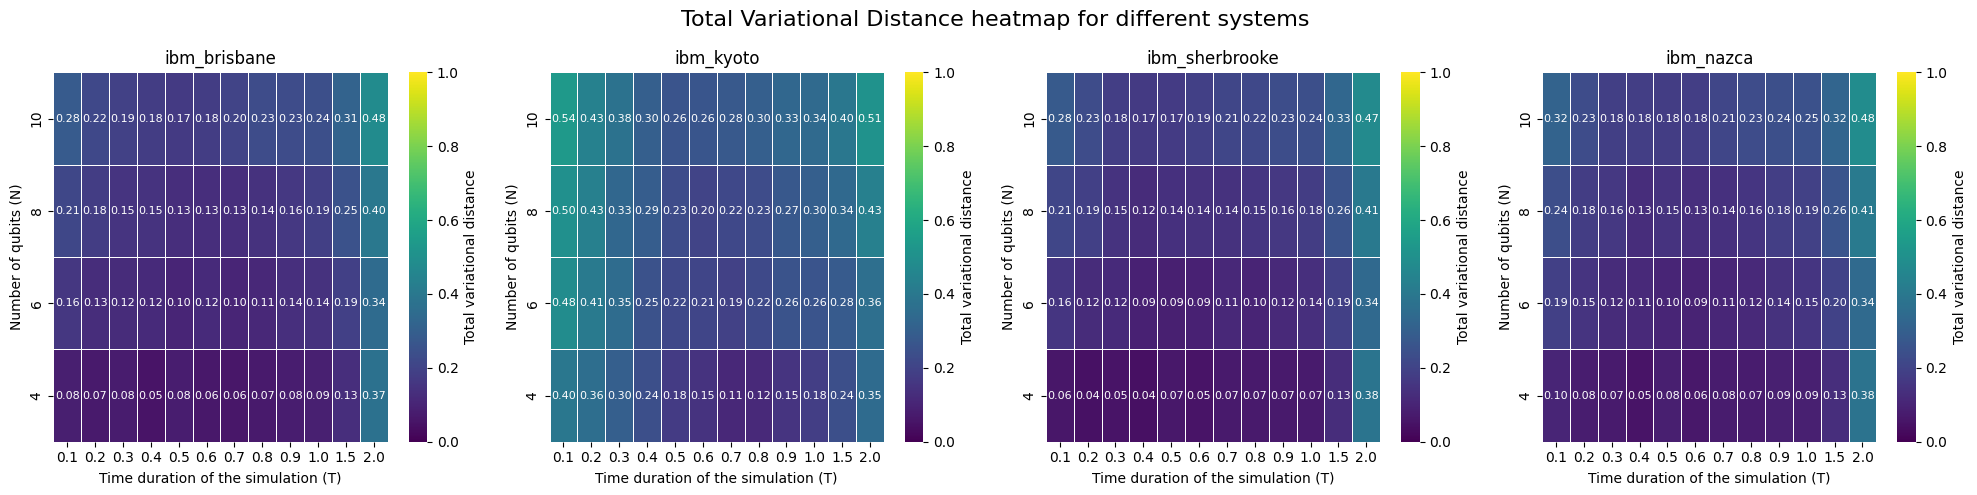

In [347]:
# Plot grid of 1x4 heatmaps
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    sns.heatmap(tv_heatmap_datas[systems[i]], 
                cmap='viridis', 
                linewidths=0.5, 
                annot=True, 
                fmt=".2f", 
                cbar_kws={'label': 'Total variational distance'}, 
                annot_kws={"size": 8}, ax=ax,
                vmin=0, 
                vmax=1
                )
    
    ax.set_title(f'{systems[i]}')
    ax.set_xlabel('Time duration of the simulation (T)')
    ax.set_ylabel('Number of qubits (N)')

plt.suptitle('Total Variational Distance heatmap for different systems', fontsize=16)
plt.tight_layout()
plt.show()

### Noise plot after FFZNE mitigation

In [354]:
data = simulator_data_df

dfs = {}
dfs['ibm_brisbane'] = data[data['System'] == 'ibm_brisbane'][['N','T','RBZNE HF','RBZNE TV']]
dfs['ibm_kyoto'] = data[data['System'] == 'ibm_kyoto'][['N','T','RBZNE HF','RBZNE TV']]
dfs['ibm_sherbrooke'] = data[data['System'] == 'ibm_sherbrooke'][['N','T','RBZNE HF','RBZNE TV']]
dfs['ibm_nazca'] = data[data['System'] == 'ibm_nazca'][['N','T','RBZNE HF','RBZNE TV']]

systems = list(dfs.keys())

hf_heatmap_datas = {}
tv_heatmap_datas = {}

# Pivot the data to create a 2D heatmap
for system,df in dfs.items():
    hf_heatmap_data = df.pivot_table(index='N', columns='T', values='RBZNE HF').sort_values(by='N', ascending=False)
    tv_heatmap_data = df.pivot_table(index='N', columns='T', values='RBZNE TV').sort_values(by='N', ascending=False)
    hf_heatmap_datas[system] = hf_heatmap_data
    tv_heatmap_datas[system] = tv_heatmap_data

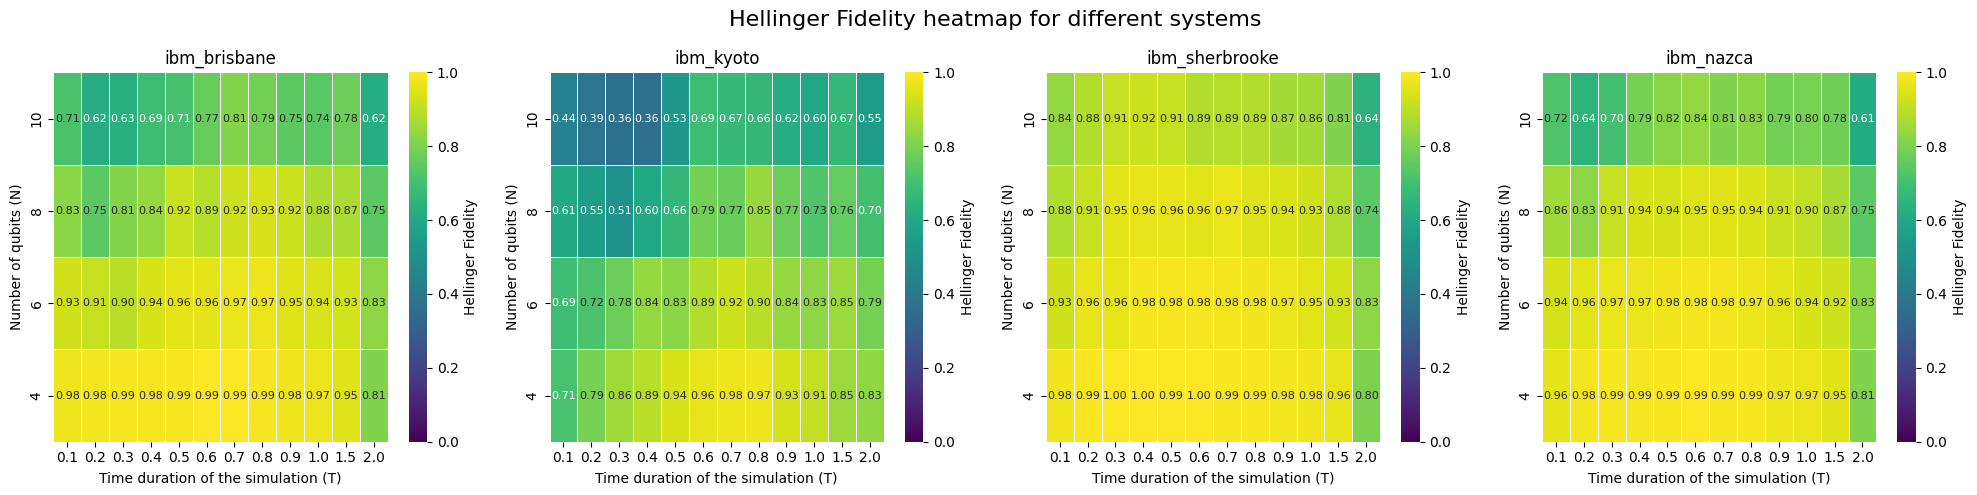

In [355]:
# Plot grid of 1x4 heatmaps
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    sns.heatmap(hf_heatmap_datas[systems[i]], 
                cmap='viridis', 
                linewidths=0.5, 
                annot=True, 
                fmt=".2f", 
                cbar_kws={'label': 'Hellinger Fidelity'}, 
                annot_kws={"size": 8}, 
                ax=ax,
                vmin=0, 
                vmax=1
                )
    
    ax.set_title(f'{systems[i]}')
    ax.set_xlabel('Time duration of the simulation (T)')
    ax.set_ylabel('Number of qubits (N)')

plt.suptitle('Hellinger Fidelity heatmap for different systems', fontsize=16)
plt.tight_layout()
plt.show()

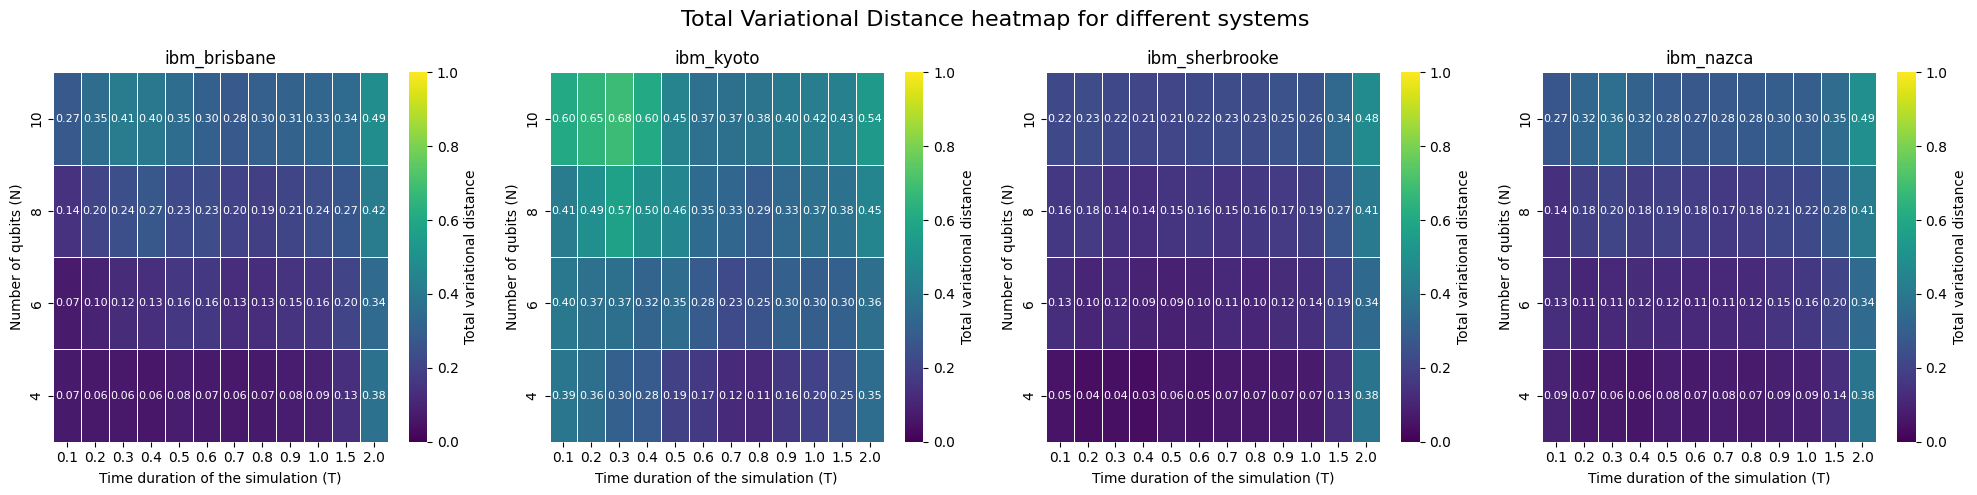

In [356]:
# Plot grid of 1x4 heatmaps
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    sns.heatmap(tv_heatmap_datas[systems[i]], 
                cmap='viridis', 
                linewidths=0.5, 
                annot=True, 
                fmt=".2f", 
                cbar_kws={'label': 'Total variational distance'}, 
                annot_kws={"size": 8}, ax=ax,
                vmin=0, 
                vmax=1
                )
    
    ax.set_title(f'{systems[i]}')
    ax.set_xlabel('Time duration of the simulation (T)')
    ax.set_ylabel('Number of qubits (N)')

plt.suptitle('Total Variational Distance heatmap for different systems', fontsize=16)
plt.tight_layout()
plt.show()

### Noise plot after RBZNE mitigation

In [357]:
data = simulator_data_df

dfs = {}
dfs['ibm_brisbane'] = data[data['System'] == 'ibm_brisbane'][['N','T','RBZNE HF','RBZNE TV']]
dfs['ibm_kyoto'] = data[data['System'] == 'ibm_kyoto'][['N','T','RBZNE HF','RBZNE TV']]
dfs['ibm_sherbrooke'] = data[data['System'] == 'ibm_sherbrooke'][['N','T','RBZNE HF','RBZNE TV']]
dfs['ibm_nazca'] = data[data['System'] == 'ibm_nazca'][['N','T','RBZNE HF','RBZNE TV']]

systems = list(dfs.keys())

hf_heatmap_datas = {}
tv_heatmap_datas = {}

# Pivot the data to create a 2D heatmap
for system,df in dfs.items():
    hf_heatmap_data = df.pivot_table(index='N', columns='T', values='RBZNE HF').sort_values(by='N', ascending=False)
    tv_heatmap_data = df.pivot_table(index='N', columns='T', values='RBZNE TV').sort_values(by='N', ascending=False)
    hf_heatmap_datas[system] = hf_heatmap_data
    tv_heatmap_datas[system] = tv_heatmap_data

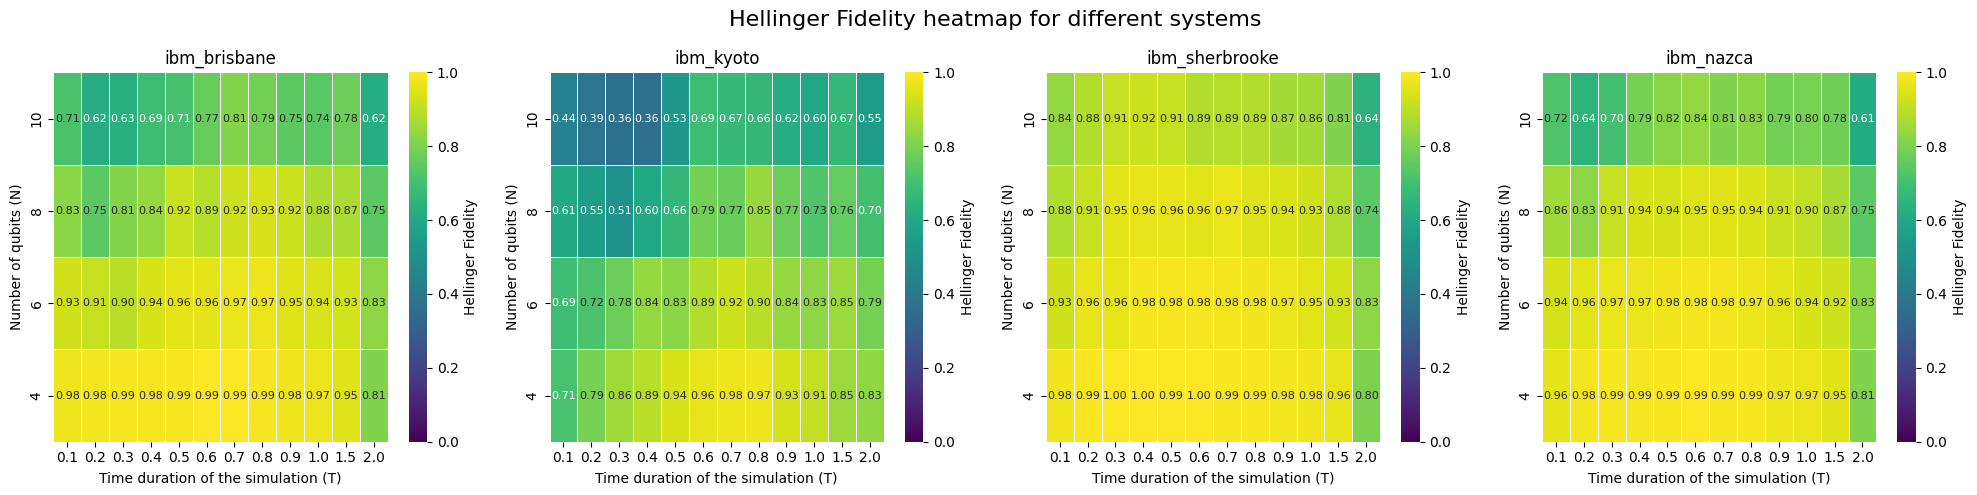

In [358]:
# Plot grid of 1x4 heatmaps
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    sns.heatmap(hf_heatmap_datas[systems[i]], 
                cmap='viridis', 
                linewidths=0.5, 
                annot=True, 
                fmt=".2f", 
                cbar_kws={'label': 'Hellinger Fidelity'}, 
                annot_kws={"size": 8}, 
                ax=ax,
                vmin=0, 
                vmax=1
                )
    
    ax.set_title(f'{systems[i]}')
    ax.set_xlabel('Time duration of the simulation (T)')
    ax.set_ylabel('Number of qubits (N)')

plt.suptitle('Hellinger Fidelity heatmap for different systems', fontsize=16)
plt.tight_layout()
plt.show()

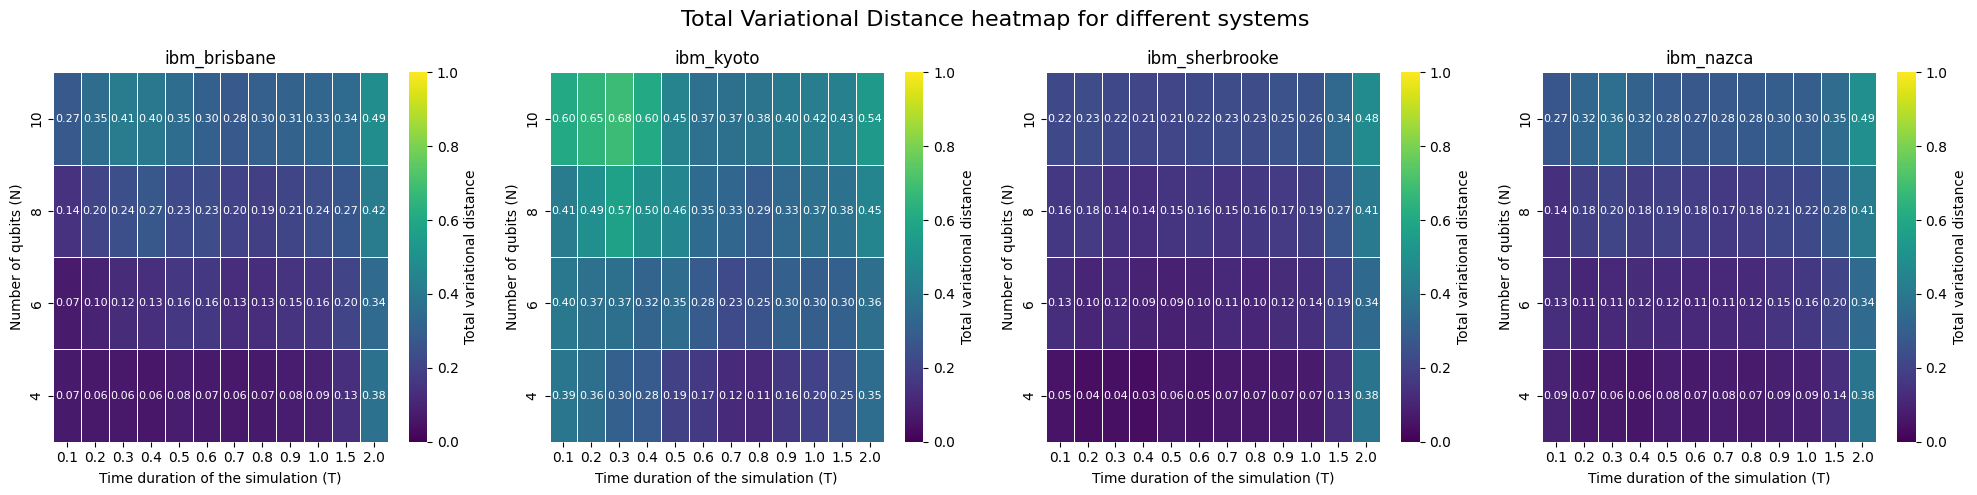

In [359]:
# Plot grid of 1x4 heatmaps
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    sns.heatmap(tv_heatmap_datas[systems[i]], 
                cmap='viridis', 
                linewidths=0.5, 
                annot=True, 
                fmt=".2f", 
                cbar_kws={'label': 'Total variational distance'}, 
                annot_kws={"size": 8}, ax=ax,
                vmin=0, 
                vmax=1
                )
    
    ax.set_title(f'{systems[i]}')
    ax.set_xlabel('Time duration of the simulation (T)')
    ax.set_ylabel('Number of qubits (N)')

plt.suptitle('Total Variational Distance heatmap for different systems', fontsize=16)
plt.tight_layout()
plt.show()

## Comparative Study

### Line plots for values

In [474]:
import matplotlib.pyplot as plt

def simulator_plot_hf_for_system(system, data):
    x_values = list(data['T'].unique())
    y_values = []

    line_mapping = ['Noise free Baseline','Noise Baseline', 'ZNE HF', 'FFZNE HF', 'RBZNE HF']

    for N in [4,6,8,10]:
        noise_free_hf = data[(data['System'] == system) & (data['N'] == N)]['Without Noise HF']
        hf = data[(data['System'] == system) & (data['N'] == N)]['Noise HF']
        zne_hf = data[(data['System'] == system) & (data['N'] == N)]['ZNE HF']
        ffzne_hf = data[(data['System'] == system) & (data['N'] == N)]['FFZNE HF']
        rbzne_hf = data[(data['System'] == system) & (data['N'] == N)]['RBZNE HF']
        y_values.append([noise_free_hf,hf, zne_hf, ffzne_hf, rbzne_hf])

    # Create a 2x2 grid of multi-line plots
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    for i in range(2):
        for j in range(2):
            ax = axes[i, j]
            idx = i * 2 + j
            for line_num, y_data in enumerate(y_values[idx]):
                ax.plot(x_values, y_data, marker='o', linestyle='-', label=f'{line_mapping[line_num]}')
            ax.set_xlabel('Time duration of the simulation (T)')
            ax.set_ylabel('Hellinger fidelity')
            ax.set_title(f'N = {idx*2 + 4}')
            ax.grid(True)
            ax.legend()

    plt.suptitle(f'Hellinger fidelity for {system} and different N and methods', fontsize=16)
    plt.tight_layout()
    plt.show()

def simulator_plot_tv_for_system(system,data):
    x_values = list(data['T'].unique())
    y_values = []

    line_mapping = ['Noise free Baseline','Noise Baseline', 'ZNE TV', 'FFZNE TV', 'RBZNE TV']

    for N in [4,6,8,10]:
        noise_free_tv = data[(data['System'] == system) & (data['N'] == N)]['Without Noise TV']
        tv = data[(data['System'] == system) & (data['N'] == N)]['Noise TV']
        zne_tv = data[(data['System'] == system) & (data['N'] == N)]['ZNE TV']
        ffzne_tv = data[(data['System'] == system) & (data['N'] == N)]['FFZNE TV']
        rbzne_tv = data[(data['System'] == system) & (data['N'] == N)]['RBZNE TV']
        y_values.append([noise_free_tv, tv, zne_tv, ffzne_tv, rbzne_tv])

    # Create a 2x2 grid of multi-line plots
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    for i in range(2):
        for j in range(2):
            ax = axes[i, j]
            idx = i * 2 + j
            for line_num, y_data in enumerate(y_values[idx]):
                ax.plot(x_values, y_data, marker='o', linestyle='-', label=f'{line_mapping[line_num]}')
            ax.set_xlabel('Time duration of the simulation (T)')
            ax.set_ylabel('Total variational distance')
            ax.set_title(f'N = {idx*2 + 4}')
            ax.grid(True)
            ax.legend()

    plt.suptitle(f'Total variational distance for {system} and different N and methods', fontsize=16)
    plt.tight_layout()
    plt.show()

def simulator_plot_hf_percentage_change_for_system(system, data):
    x_values = list(data['T'].unique())
    y_values = []

    line_mapping = ['ZNE HF % change', 'FFZNE HF % change', 'RBZNE HF % change']

    for N in [4,6,8,10]:
        zne_hf = data[(data['System'] == system) & (data['N'] == N)]['ZNE HF % change']
        ffzne_hf = data[(data['System'] == system) & (data['N'] == N)]['FFZNE HF % change']
        rbzne_hf = data[(data['System'] == system) & (data['N'] == N)]['RBZNE HF % change']
        y_values.append([zne_hf, ffzne_hf, rbzne_hf])

    # Create a 2x2 grid of multi-line plots
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    for i in range(2):
        for j in range(2):
            ax = axes[i, j]
            idx = i * 2 + j
            for line_num, y_data in enumerate(y_values[idx]):
                ax.plot(x_values, y_data, marker='o', linestyle='-', label=f'{line_mapping[line_num]}')
            ax.axhline(y=0, color='red', linestyle='--', label='Baseline')
            ax.set_xlabel('Time duration of the simulation (T)')
            ax.set_ylabel('Hellinger fidelity')
            ax.set_title(f'N = {idx*2 + 4}')
            ax.grid(True)
            ax.legend()

    plt.suptitle(f'Hellinger fidelity for {system} and different N and methods', fontsize=16)
    plt.tight_layout()
    plt.show()

def simulator_plot_tv_percentage_change_for_system(system,data):
    x_values = list(data['T'].unique())
    y_values = []

    line_mapping = ['ZNE TV % change', 'FFZNE TV % change', 'RBZNE TV % change']

    for N in [4,6,8,10]:
        zne_tv = data[(data['System'] == system) & (data['N'] == N)]['ZNE TV % change']
        ffzne_tv = data[(data['System'] == system) & (data['N'] == N)]['FFZNE TV % change']
        rbzne_tv = data[(data['System'] == system) & (data['N'] == N)]['RBZNE TV % change']
        y_values.append([zne_tv, ffzne_tv, rbzne_tv])

    # Create a 2x2 grid of multi-line plots
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    for i in range(2):
        for j in range(2):
            ax = axes[i, j]
            idx = i * 2 + j
            for line_num, y_data in enumerate(y_values[idx]):
                ax.plot(x_values, y_data, marker='o', linestyle='-', label=f'{line_mapping[line_num]}')
            ax.axhline(y=0, color='red', linestyle='--', label='Baseline')
            ax.set_xlabel('Time duration of the simulation (T)')
            ax.set_ylabel('Total variational distance')
            ax.set_title(f'N = {idx*2 + 4}')
            ax.grid(True)
            ax.legend()

    plt.suptitle(f'Total variational distance for {system} and different N and methods', fontsize=16)
    plt.tight_layout()
    plt.show()

#### Hellinger Fidelity

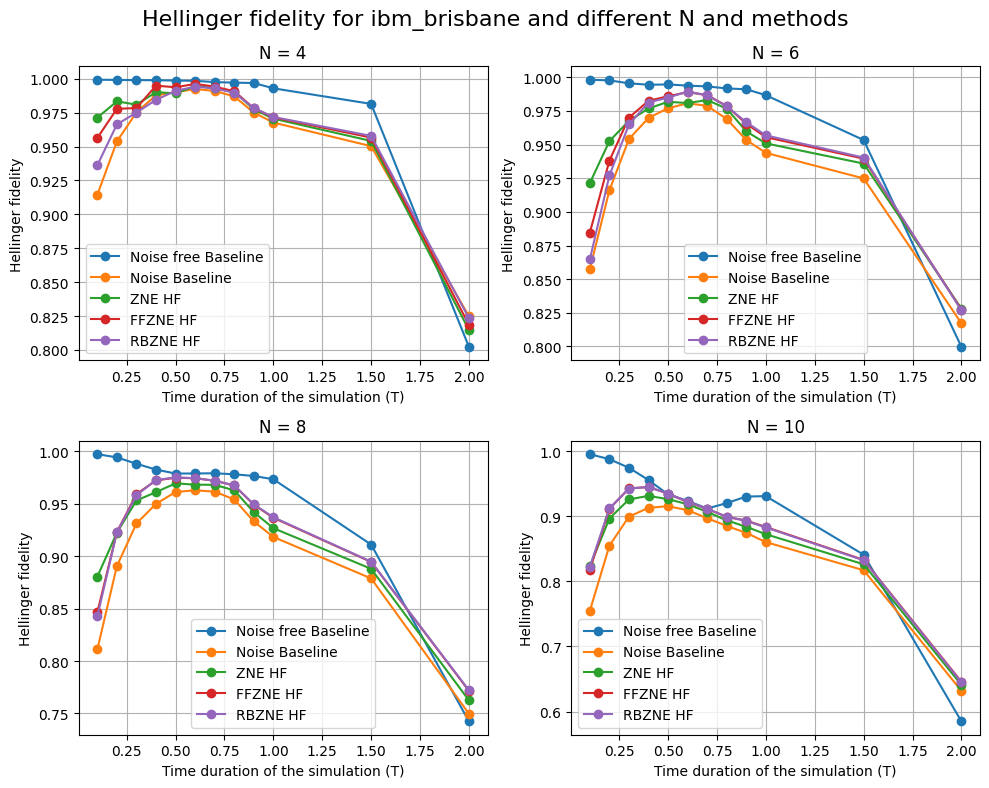

In [475]:
simulator_plot_hf_for_system('ibm_brisbane', simulator_data_df)

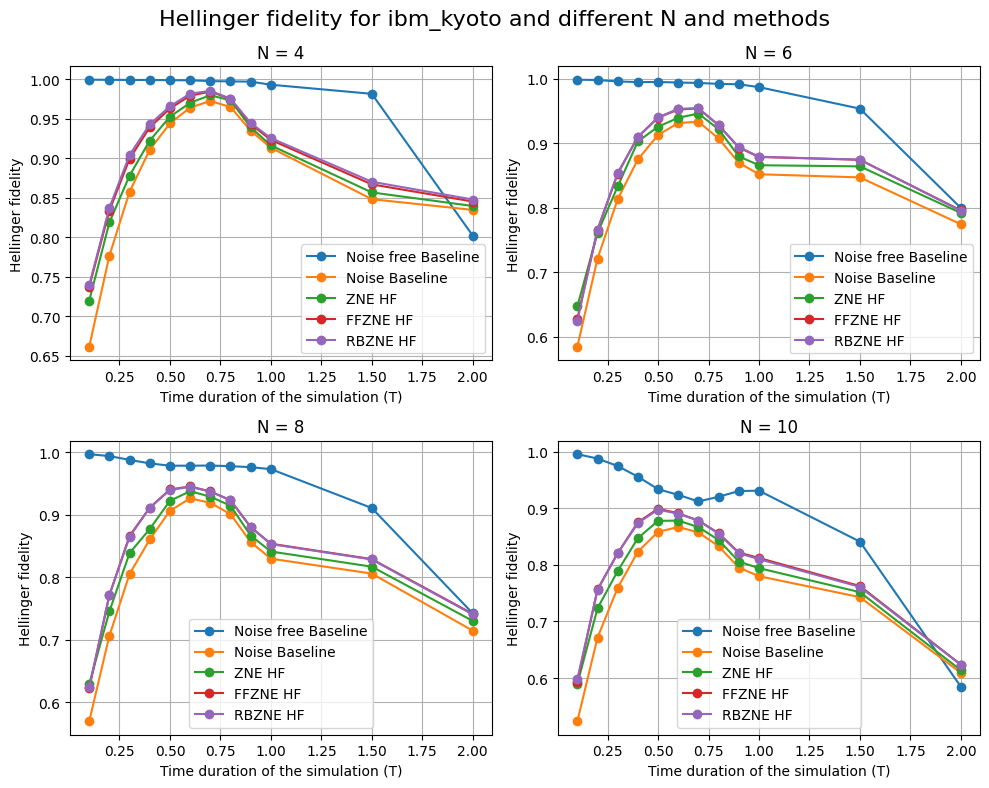

In [476]:
simulator_plot_hf_for_system('ibm_kyoto', simulator_data_df)

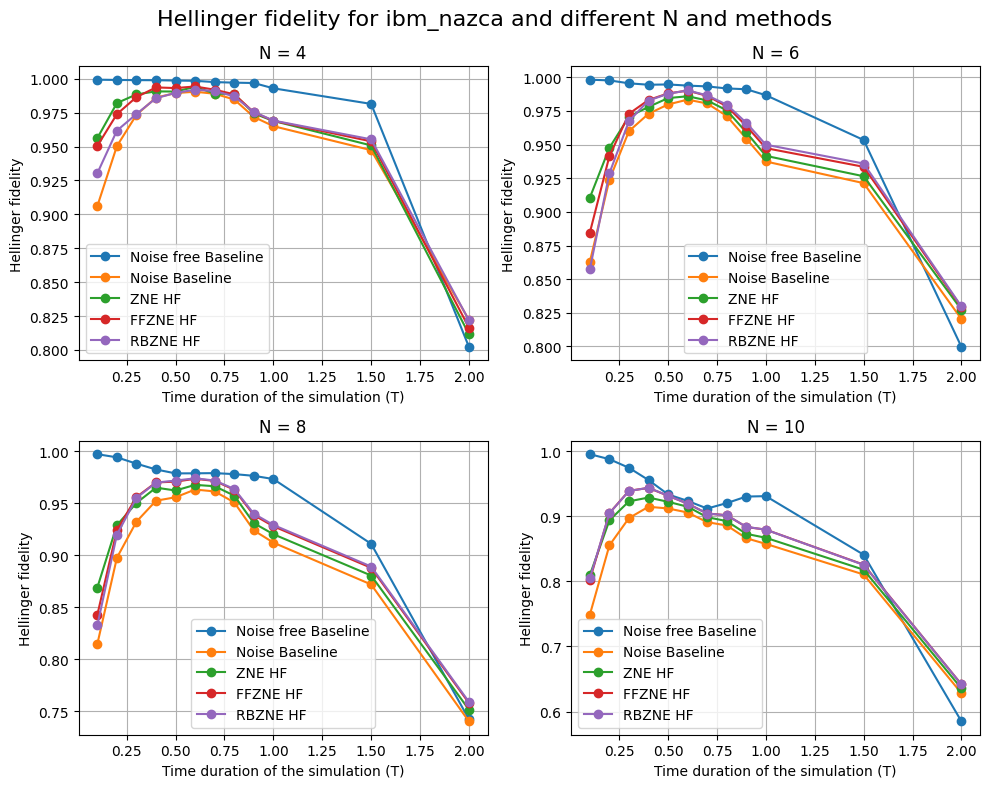

In [477]:
simulator_plot_hf_for_system('ibm_nazca', simulator_data_df)

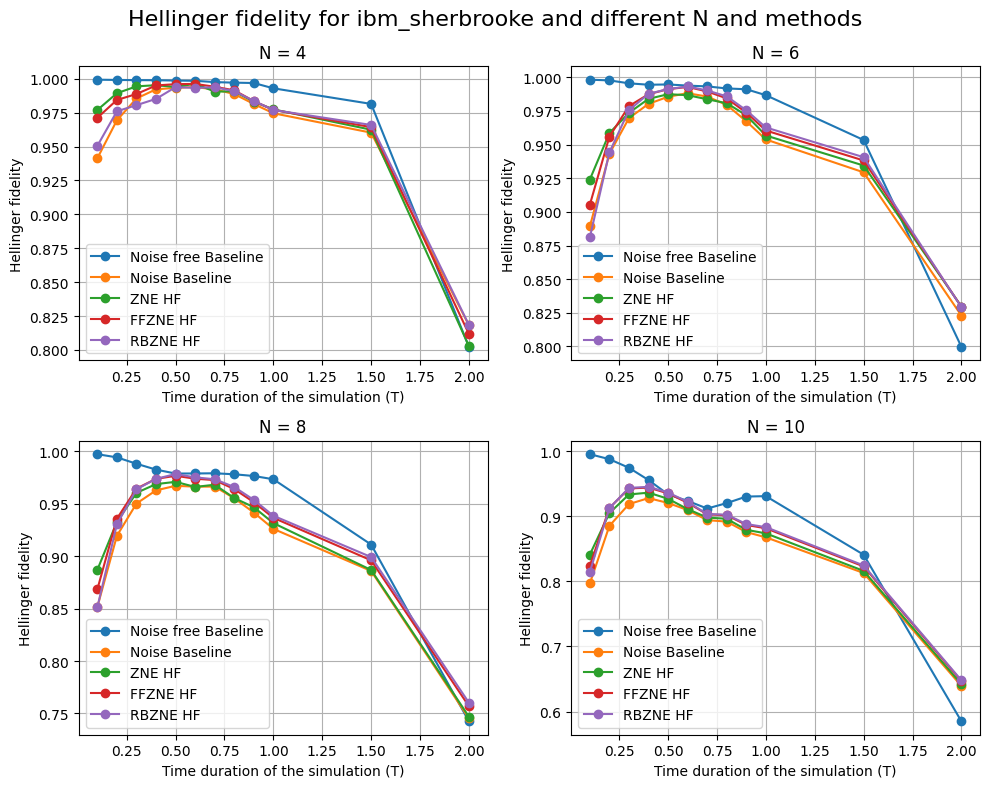

In [478]:
simulator_plot_hf_for_system('ibm_sherbrooke', simulator_data_df)

#### Total Variational Distance

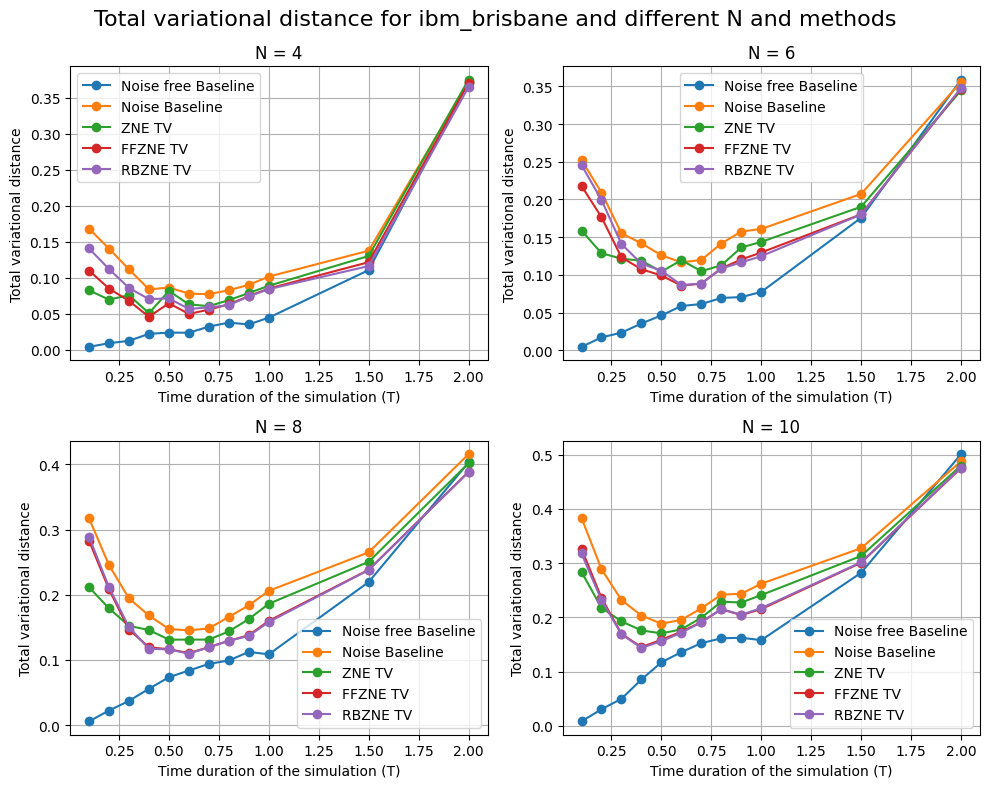

In [479]:
simulator_plot_tv_for_system('ibm_brisbane', simulator_data_df)

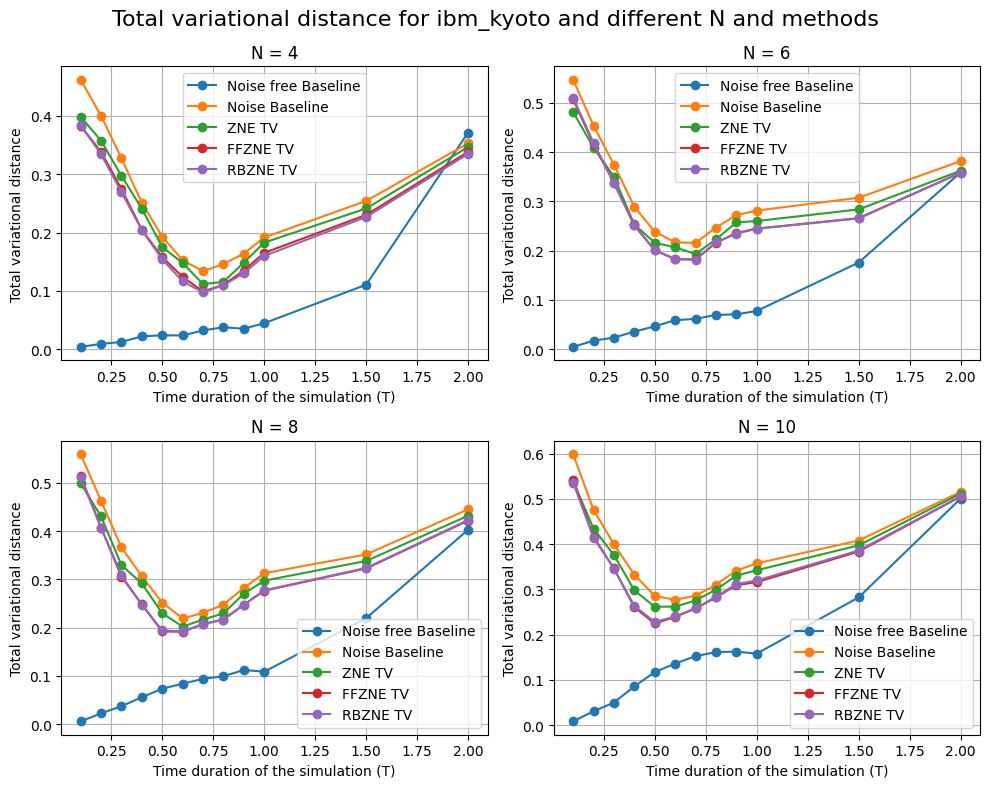

In [480]:
simulator_plot_tv_for_system('ibm_kyoto', simulator_data_df)

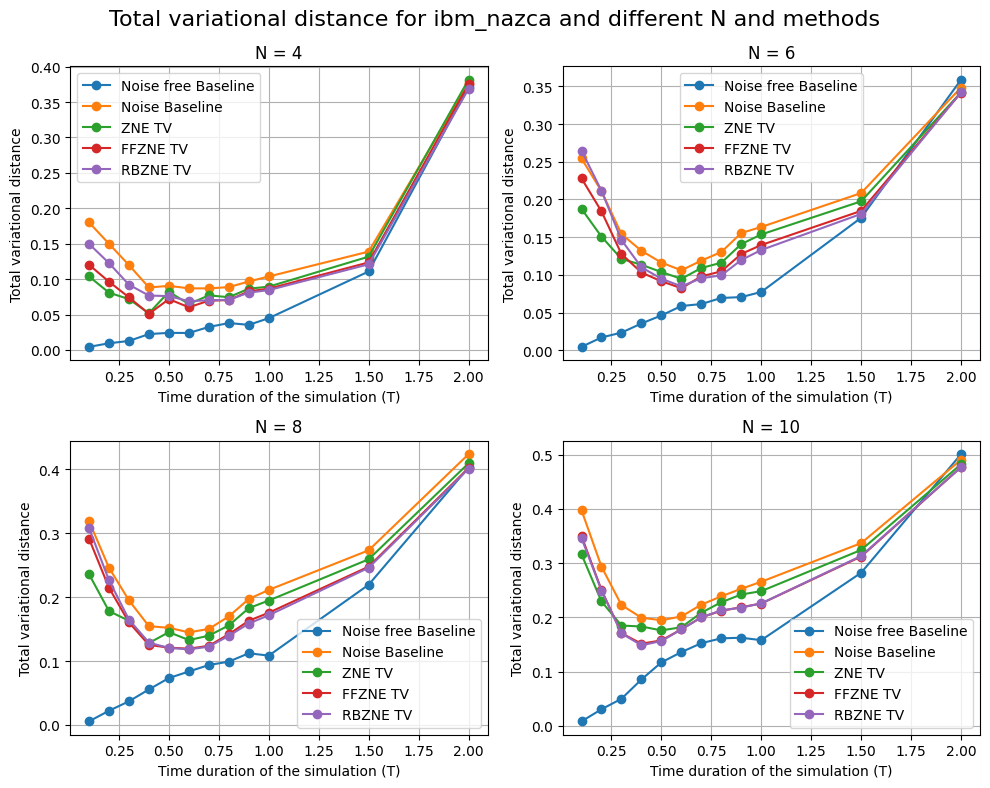

In [481]:
simulator_plot_tv_for_system('ibm_nazca', simulator_data_df)

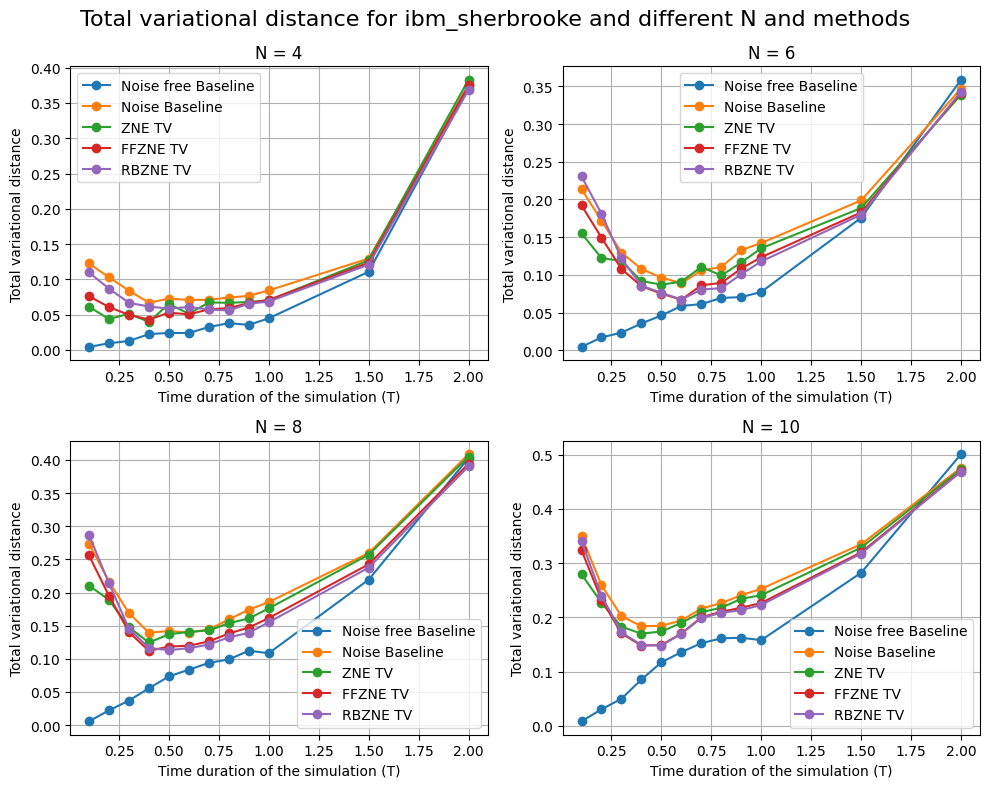

In [482]:
simulator_plot_tv_for_system('ibm_sherbrooke', simulator_data_df)

#### Hellinger percentage change

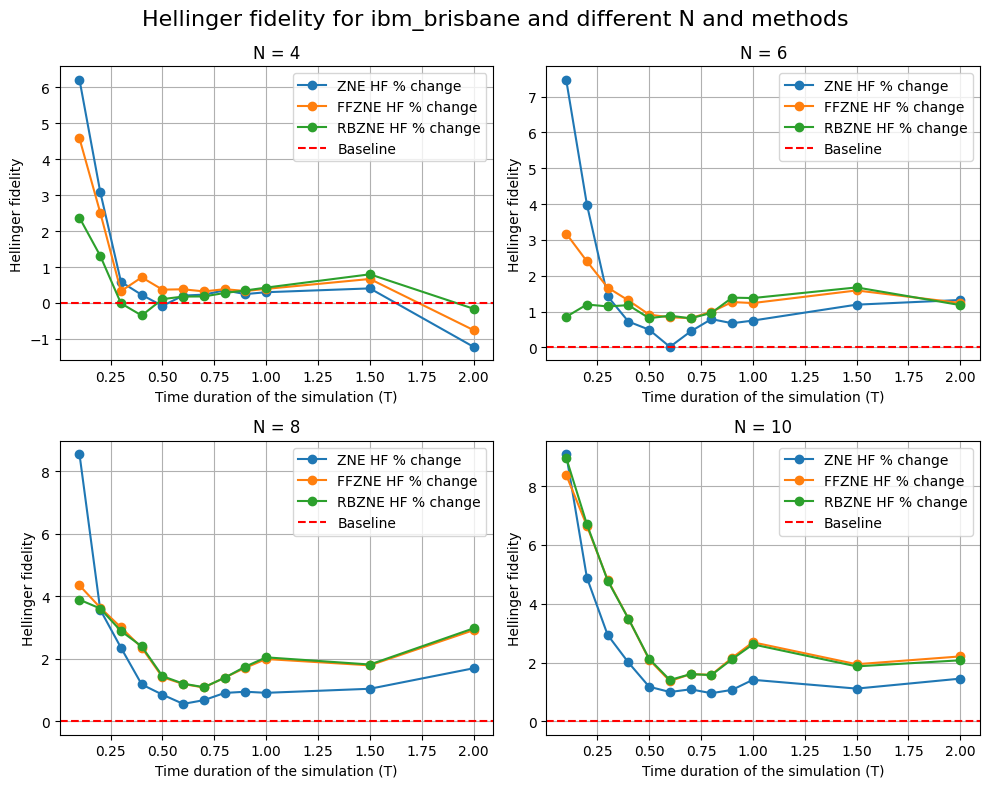

In [483]:
simulator_plot_hf_percentage_change_for_system('ibm_brisbane', simulator_data_df)

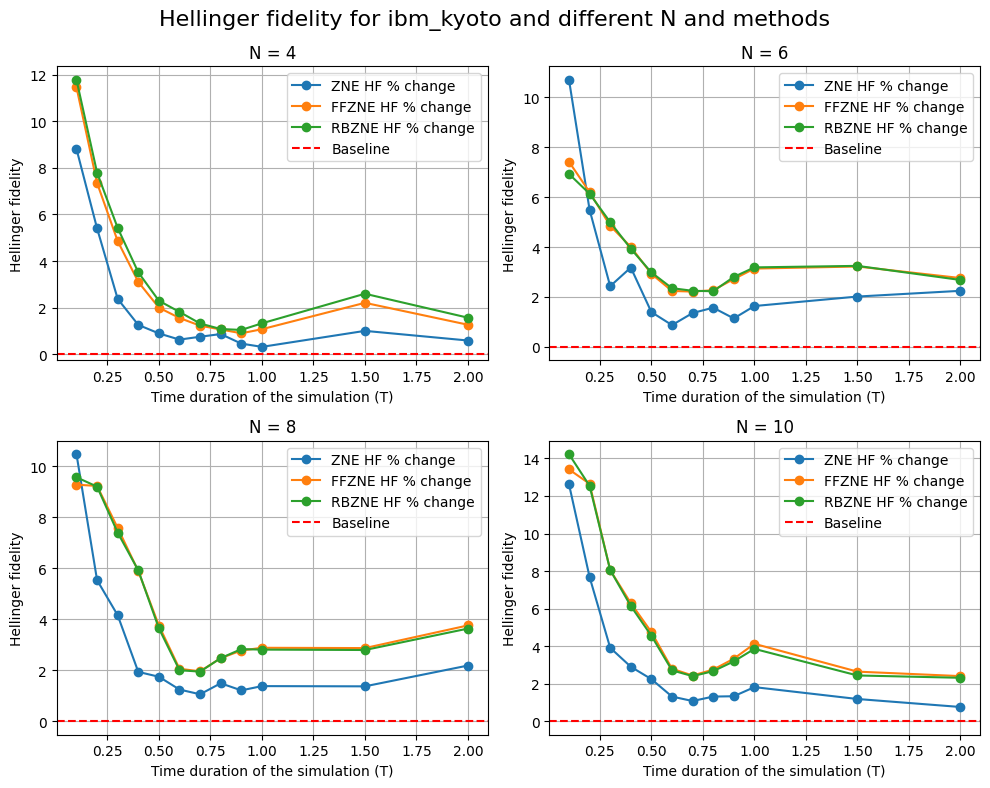

In [484]:
simulator_plot_hf_percentage_change_for_system('ibm_kyoto', simulator_data_df)

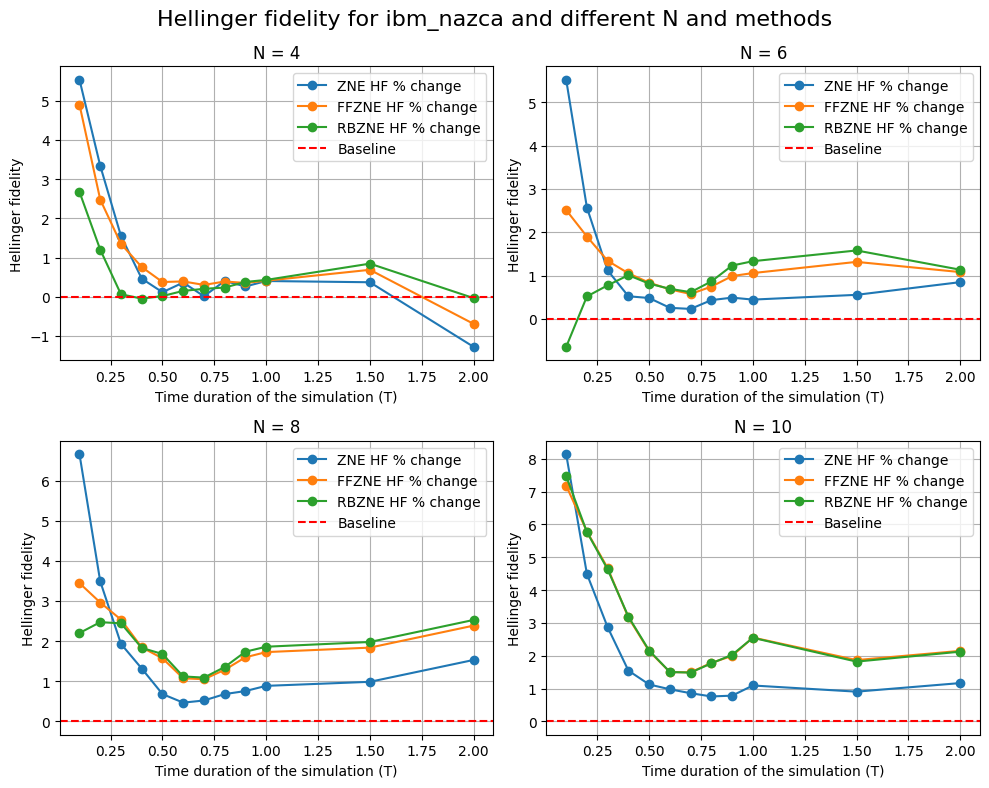

In [485]:
simulator_plot_hf_percentage_change_for_system('ibm_nazca', simulator_data_df)

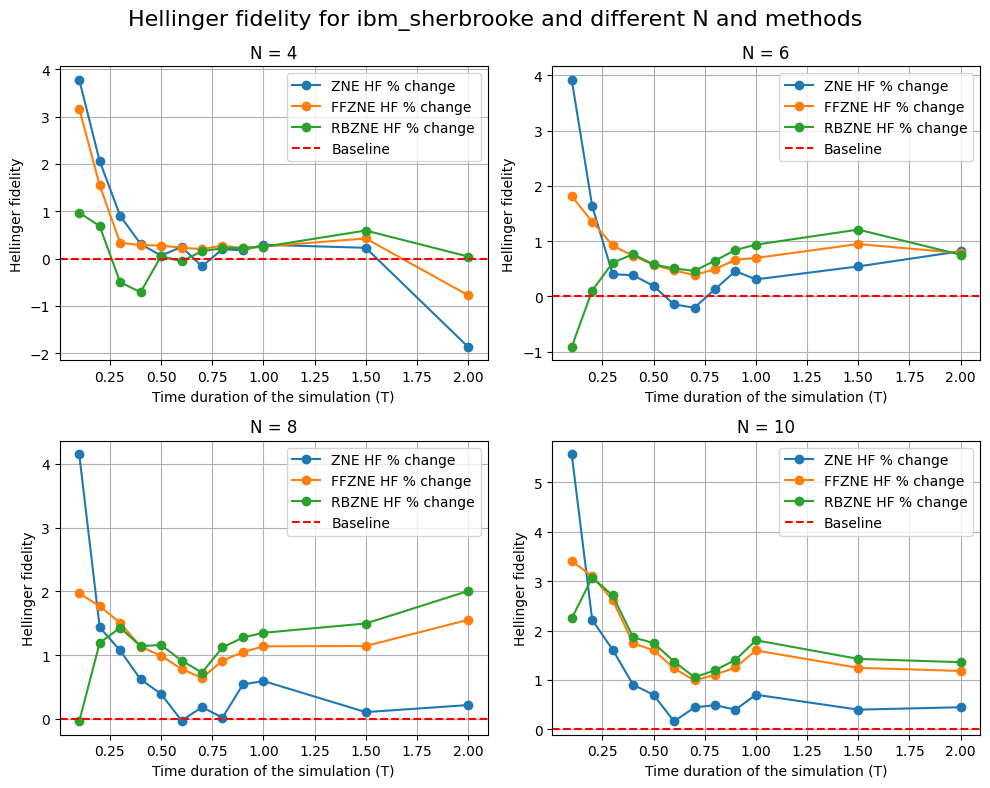

In [486]:
simulator_plot_hf_percentage_change_for_system('ibm_sherbrooke', simulator_data_df)

#### Total Variational Distance Percentage Change

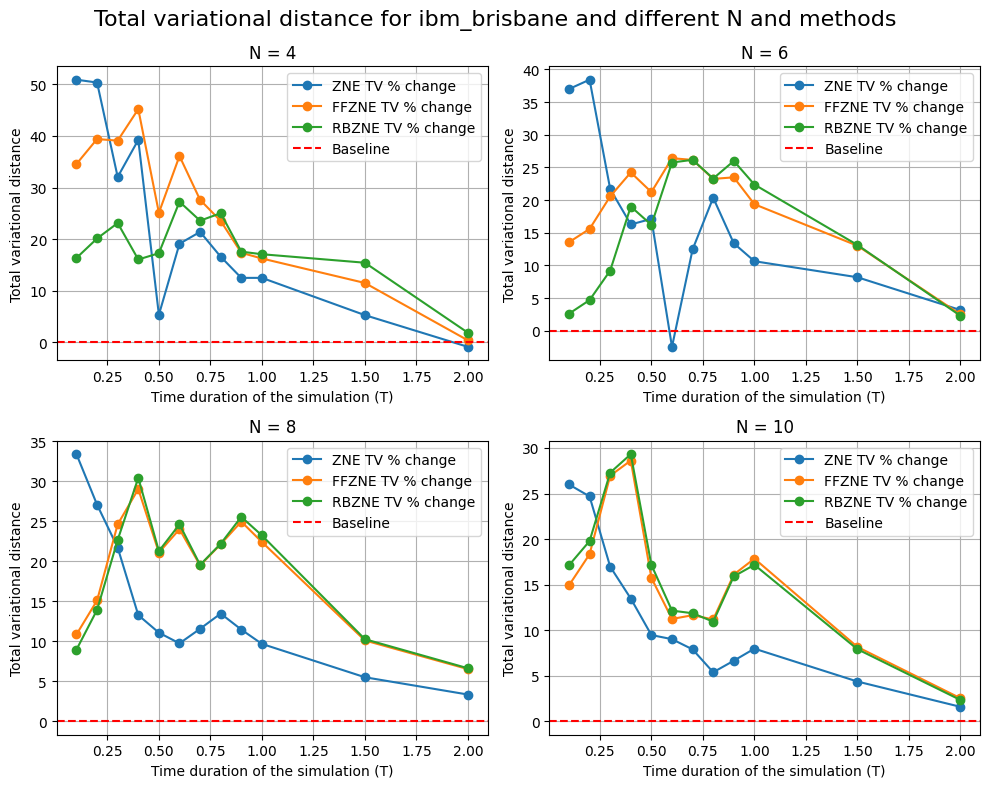

In [487]:
simulator_plot_tv_percentage_change_for_system('ibm_brisbane', simulator_data_df)

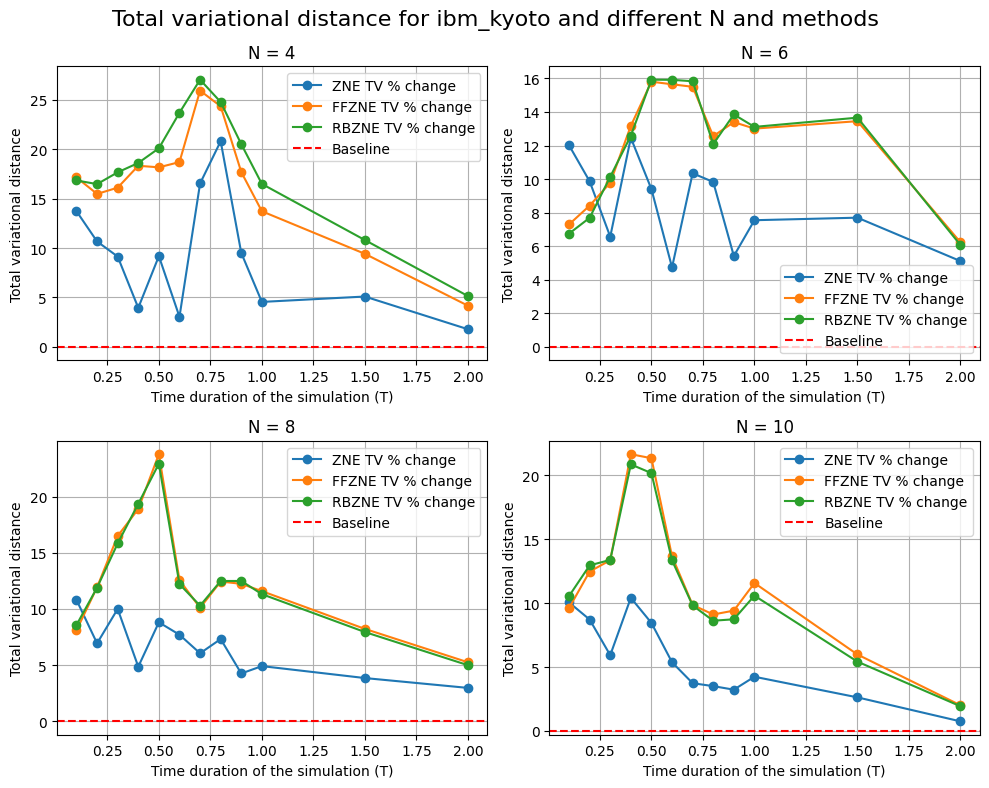

In [488]:
simulator_plot_tv_percentage_change_for_system('ibm_kyoto', simulator_data_df)

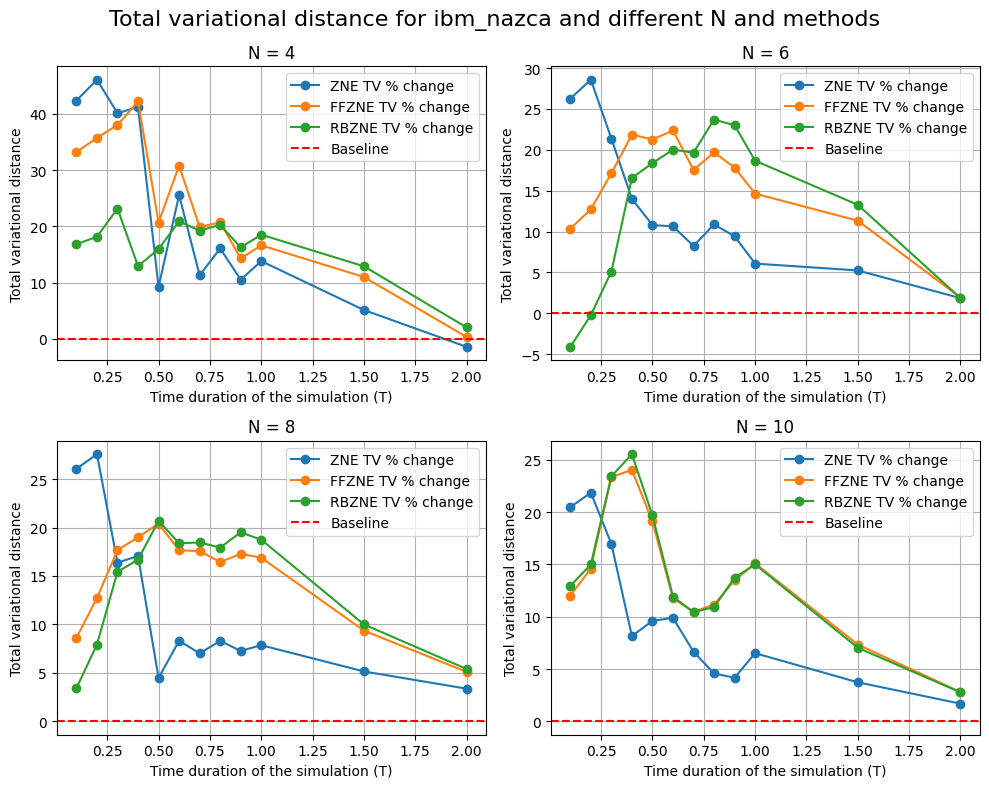

In [489]:
simulator_plot_tv_percentage_change_for_system('ibm_nazca', simulator_data_df)

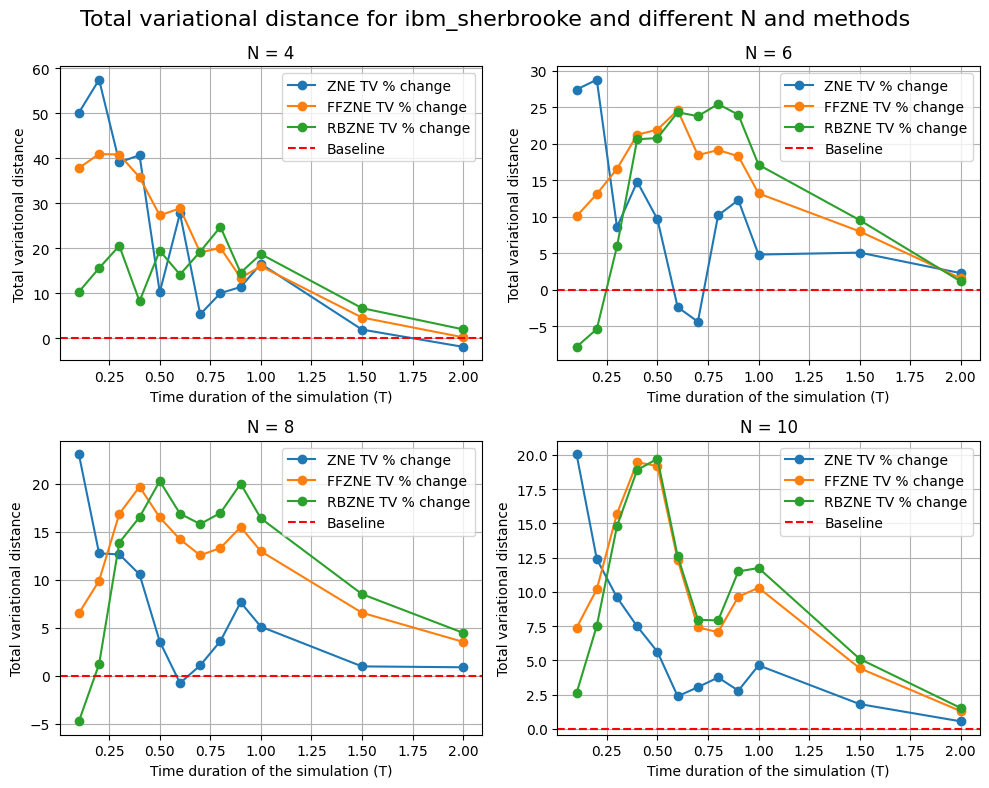

In [490]:
simulator_plot_tv_percentage_change_for_system('ibm_sherbrooke', simulator_data_df)

### Geometric mean

#### Geometric mean for each system and N

In [491]:
def get_geometric_means_for_system_and_N(system, data, dist):
    # Calculate the geometric mean for each N
    zne_geometric_means = list(map(lambda x: np.prod(1 + x/100)**(1/len(x)), [data[(data['System'] == system) & (data['N'] == 4)][f'ZNE {dist} % change'],
                                                                              data[(data['System'] == system) & (data['N'] == 6)][f'ZNE {dist} % change'],
                                                                                data[(data['System'] == system) & (data['N'] == 8)][f'ZNE {dist} % change'],
                                                                                data[(data['System'] == system) & (data['N'] == 10)][f'ZNE {dist} % change']]))

    ffzne_geomtric_means = list(map(lambda x: np.prod(1 + x/100)**(1/len(x)), [data[(data['System'] == system) & (data['N'] == 4)][f'FFZNE {dist} % change'],
                                                                              data[(data['System'] == system) & (data['N'] == 6)][f'FFZNE {dist} % change'],
                                                                                data[(data['System'] == system) & (data['N'] == 8)][f'FFZNE {dist} % change'],
                                                                                data[(data['System'] == system) & (data['N'] == 10)][f'FFZNE {dist} % change']]))

    rbzne_geometric_means = list(map(lambda x: np.prod(1 + x/100)**(1/len(x)), [data[(data['System'] == system) & (data['N'] == 4)][f'RBZNE {dist} % change'],
                                                                                data[(data['System'] == system) & (data['N'] == 6)][f'RBZNE {dist} % change'],
                                                                                data[(data['System'] == system) & (data['N'] == 8)][f'RBZNE {dist} % change'],
                                                                                data[(data['System'] == system) & (data['N'] == 10)][f'RBZNE {dist} % change']]))

    return [zne_geometric_means, ffzne_geomtric_means, rbzne_geometric_means]

##### Hellinger Fidelity

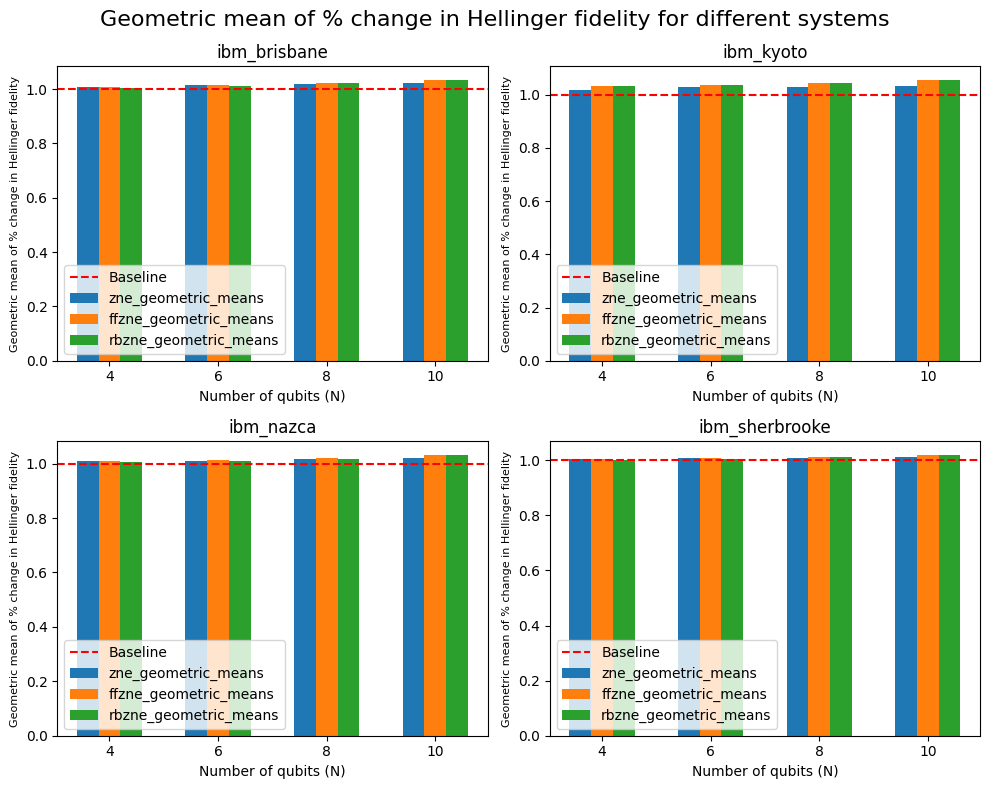

In [492]:
import matplotlib.pyplot as plt
import numpy as np

data = simulator_data_df

# Sample data
categories = [4,6,8,10]
ibm_brisbane_means = get_geometric_means_for_system_and_N('ibm_brisbane', data,'HF')
ibm_kyoto_means = get_geometric_means_for_system_and_N('ibm_kyoto', data,'HF')
ibm_nazca_means = get_geometric_means_for_system_and_N('ibm_nazca', data,'HF')
ibm_sherbrooke_means = get_geometric_means_for_system_and_N('ibm_sherbrooke', data,'HF')

# Define the width of the bars
bar_width = 0.2

# Set the position of the bars on the x-axis
x = np.arange(len(categories))

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array to iterate over it
axes = axes.flatten()

group_labels = ['zne_geometric_means', 'ffzne_geometric_means', 'rbzne_geometric_means']
plot_labels = ['ibm_brisbane', 'ibm_kyoto', 'ibm_nazca', 'ibm_sherbrooke']   

# Plot each multi-bar graph in a subplot
for i, ax in enumerate(axes):
    if i == 0:
        values = ibm_brisbane_means

    elif i == 1:
        values = ibm_kyoto_means

    elif i == 2:
        values = ibm_nazca_means

    else:
        values = ibm_sherbrooke_means

        
    for j, v in enumerate(values):
        ax.bar(x + j * bar_width, v, width=bar_width, label=f'{group_labels[j]}')
        
    ax.set_xlabel('Number of qubits (N)')
    ax.set_ylabel('Geometric mean of % change in Hellinger fidelity', fontsize=8)
    ax.set_title(f'{plot_labels[i]}')
    ax.set_xticks(x + bar_width / 2 * (len(values) - 1))
    ax.set_xticklabels(categories)
    
    # Draw a horizontal line at y=1
    ax.axhline(y=1, color='red', linestyle='--', label='Baseline')
    ax.legend()

plt.suptitle('Geometric mean of % change in Hellinger fidelity for different systems', fontsize=16)
plt.tight_layout()
plt.show()


##### Total Variational Distance

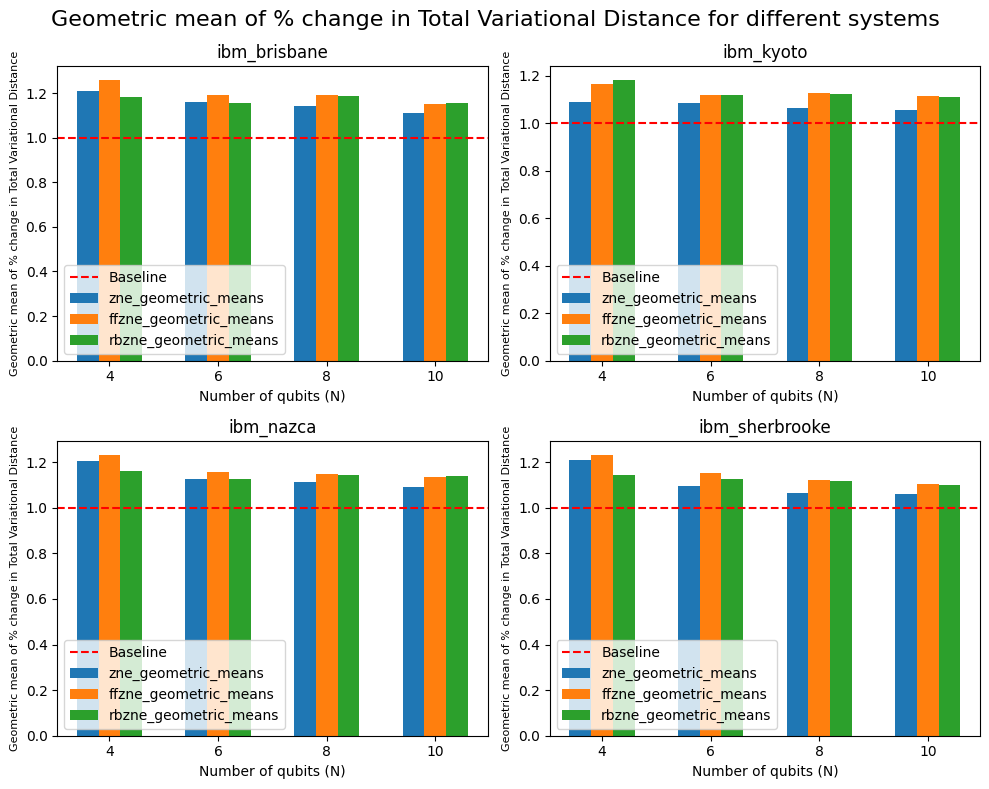

In [493]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = [4,6,8,10]
ibm_brisbane_means = get_geometric_means_for_system_and_N('ibm_brisbane', data,'TV')
ibm_kyoto_means = get_geometric_means_for_system_and_N('ibm_kyoto', data,'TV')
ibm_nazca_means = get_geometric_means_for_system_and_N('ibm_nazca', data,'TV')
ibm_sherbrooke_means = get_geometric_means_for_system_and_N('ibm_sherbrooke', data,'TV')

# Define the width of the bars
bar_width = 0.2

# Set the position of the bars on the x-axis
x = np.arange(len(categories))

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array to iterate over it
axes = axes.flatten()

group_labels = ['zne_geometric_means', 'ffzne_geometric_means', 'rbzne_geometric_means']
plot_labels = ['ibm_brisbane', 'ibm_kyoto', 'ibm_nazca', 'ibm_sherbrooke']   

# Plot each multi-bar graph in a subplot
for i, ax in enumerate(axes):
    if i == 0:
        values = ibm_brisbane_means

    elif i == 1:
        values = ibm_kyoto_means

    elif i == 2:
        values = ibm_nazca_means

    else:
        values = ibm_sherbrooke_means

        
    for j, v in enumerate(values):
        ax.bar(x + j * bar_width, v, width=bar_width, label=f'{group_labels[j]}')
        
    ax.set_xlabel('Number of qubits (N)')
    ax.set_ylabel('Geometric mean of % change in Total Variational Distance', fontsize=8)
    ax.set_title(f'{plot_labels[i]}')
    ax.set_xticks(x + bar_width / 2 * (len(values) - 1))
    ax.set_xticklabels(categories)
    
    # Draw a horizontal line at y=1
    ax.axhline(y=1, color='red', linestyle='--', label='Baseline')
    ax.legend()

plt.suptitle('Geometric mean of % change in Total Variational Distance for different systems', fontsize=16)
plt.tight_layout()
plt.show()


#### Geometric mean for each system

In [494]:
import matplotlib.pyplot as plt

def get_geometric_means_for_dist(dist, data):
    # Calculate the geometric mean for each N

    from functools import reduce
    
    # Calculate the geometric mean for records with system as ibm_brisbane
    brisbane_transformed = list(map(lambda x: 1 + x/100, data[data['System'] == 'ibm_brisbane'][dist]))
    brisbane_geometric_mean = reduce(lambda x, y: x*y, brisbane_transformed)**(1/len(brisbane_transformed))

    kyoto_transformed = list(map(lambda x: 1 + x/100, data[data['System'] == 'ibm_kyoto'][dist]))
    kyoto_geometric_mean = reduce(lambda x, y: x*y, kyoto_transformed)**(1/len(kyoto_transformed))

    nazca_transformed = list(map(lambda x: 1 + x/100, data[data['System'] == 'ibm_nazca'][dist]))
    nazca_geometric_mean = reduce(lambda x, y: x*y, nazca_transformed)**(1/len(nazca_transformed))

    sherbrooke_transformed = list(map(lambda x: 1 + x/100, data[data['System'] == 'ibm_sherbrooke'][dist]))
    sherbrooke_geometric_mean = reduce(lambda x, y: x*y, sherbrooke_transformed)**(1/len(sherbrooke_transformed))

    return [brisbane_geometric_mean, kyoto_geometric_mean, nazca_geometric_mean, sherbrooke_geometric_mean]

##### Hellinger fidelity

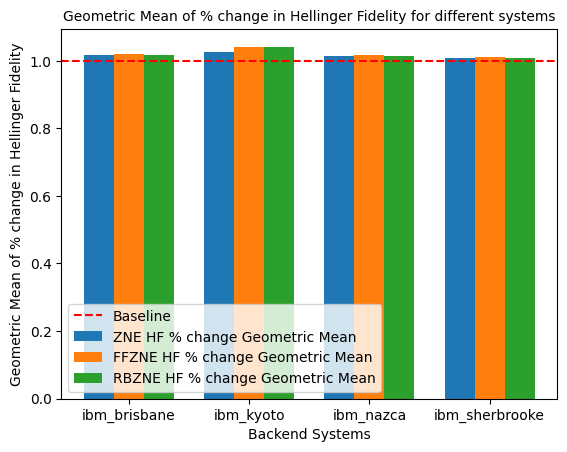

In [495]:
# Data
data = simulator_data_df

categories = ['ibm_brisbane', 'ibm_kyoto', 'ibm_nazca', 'ibm_sherbrooke']

zne_hf = get_geometric_means_for_dist('ZNE HF % change',data)  # Values for the first set of bars
ffzne_hf = get_geometric_means_for_dist('FFZNE HF % change',data)  # Values for the second set of bars
rbzne_hf = get_geometric_means_for_dist('RBZNE HF % change',data)  # Values for the third set of bars

# Bar width
bar_width = 0.25

# Positions for the bars
x = np.arange(len(categories))

# Plotting the bars
plt.bar(x, zne_hf, width=bar_width, label='ZNE HF % change Geometric Mean')
plt.bar(x + bar_width, ffzne_hf, width=bar_width, label='FFZNE HF % change Geometric Mean')
plt.bar(x + 2 * bar_width, rbzne_hf, width=bar_width, label='RBZNE HF % change Geometric Mean')

# Draw a horizontal line at y=1
plt.axhline(y=1, color='red', linestyle='--', label='Baseline')

# Adding labels and title
plt.xlabel('Backend Systems')
plt.ylabel('Geometric Mean of % change in Hellinger Fidelity')
plt.title('Geometric Mean of % change in Hellinger Fidelity for different systems', fontsize=10)
plt.xticks(x + bar_width, categories)
plt.legend()

# Show plot
plt.show()


##### Total Variational Distance

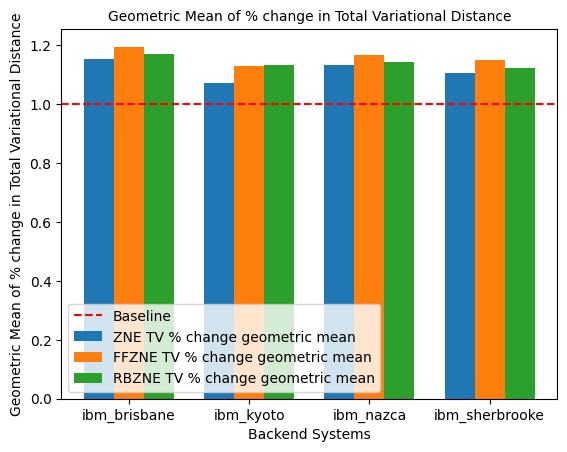

In [496]:
zne_tv = get_geometric_means_for_dist('ZNE TV % change',data)  # Values for the first set of bars
ffzne_tv = get_geometric_means_for_dist('FFZNE TV % change',data)  # Values for the second set of bars
rbzne_tv = get_geometric_means_for_dist('RBZNE TV % change',data)  # Values for the third set of bars

# Bar width
bar_width = 0.25

# Positions for the bars
x = np.arange(len(categories))

# Plotting the bars
plt.bar(x, zne_tv, width=bar_width, label='ZNE TV % change geometric mean')
plt.bar(x + bar_width, ffzne_tv, width=bar_width, label='FFZNE TV % change geometric mean')
plt.bar(x + 2 * bar_width, rbzne_tv, width=bar_width, label='RBZNE TV % change geometric mean')

# Draw a horizontal line at y=1
plt.axhline(y=1, color='red', linestyle='--', label='Baseline')

# Adding labels and title
plt.xlabel('Backend Systems')
plt.ylabel('Geometric Mean of % change in Total Variational Distance')
plt.title('Geometric Mean of % change in Total Variational Distance', fontsize=10)
plt.xticks(x + bar_width, categories)
plt.legend()

# Show plot
plt.show()


#### Geometric mean for each method

In [497]:
from functools import reduce

data = simulator_data_df

def get_geometric_mean_for_method(data,dist):

    hf_transformed = list(map(lambda x: 1 + x/100, data[f'{dist} HF % change'])) 
    hf_geometric_mean = reduce(lambda x, y: x*y, hf_transformed)**(1/len(hf_transformed))

    tv_transformed = list(map(lambda x: 1 + x/100, data[f'{dist} TV % change']))
    tv_geometric_mean = reduce(lambda x, y: x*y, tv_transformed)**(1/len(tv_transformed))

    return [hf_geometric_mean, tv_geometric_mean]

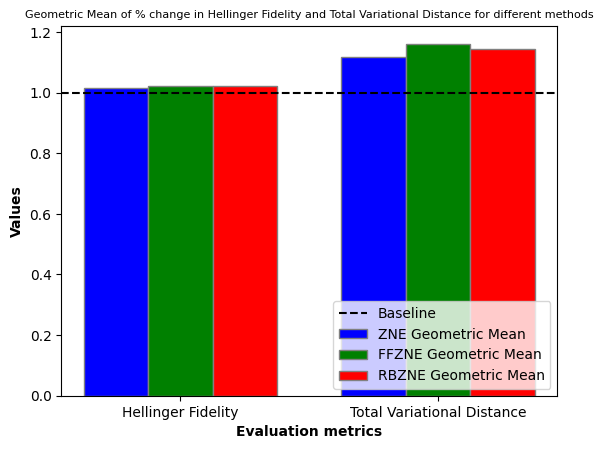

In [498]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Hellinger Fidelity', 'Total Variational Distance']
zne_means = get_geometric_mean_for_method(data,'ZNE')
ffzne_means = get_geometric_mean_for_method(data,'FFZNE')
rbzne_means = get_geometric_mean_for_method(data,'RBZNE')

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bars
plt.bar(r1, zne_means, color='b', width=bar_width, edgecolor='grey', label='ZNE Geometric Mean')
plt.bar(r2, ffzne_means, color='g', width=bar_width, edgecolor='grey', label='FFZNE Geometric Mean')
plt.bar(r3, rbzne_means, color='r', width=bar_width, edgecolor='grey', label='RBZNE Geometric Mean')

# Add horizontal lines at y=1
plt.axhline(y=1, color='black', linestyle='--', label='Baseline')

# Adding labels and title
plt.xlabel('Evaluation metrics', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(categories))], categories)
plt.title('Geometric Mean of % change in Hellinger Fidelity and Total Variational Distance for different methods', fontsize=8)

# Adding legend
plt.legend(loc='lower right')

# Show plot
plt.show()


# Real Backend Results Analysis

## Setup

In [499]:
# Load the data
with open('Real hardware execution/summary_df.pkl', 'rb') as f:
    data = pickle.load(f)

## Noise plots

In [500]:
dfs = {}
dfs['ibm_brisbane'] = data[data['System'] == 'ibm_brisbane'][['N','T','Noise HF','Noise TV']]
dfs['ibm_kyoto'] = data[data['System'] == 'ibm_kyoto'][['N','T','Noise HF','Noise TV']]
dfs['ibm_sherbrooke'] = data[data['System'] == 'ibm_sherbrooke'][['N','T','Noise HF','Noise TV']]
dfs['ibm_nazca'] = data[data['System'] == 'ibm_nazca'][['N','T','Noise HF','Noise TV']]

systems = list(dfs.keys())

hf_heatmap_datas = {}
tv_heatmap_datas = {}

# Pivot the data to create a 2D heatmap
for system,df in dfs.items():
    hf_heatmap_data = df.pivot_table(index='N', columns='T', values='Noise HF').sort_values(by='N', ascending=False)
    tv_heatmap_data = df.pivot_table(index='N', columns='T', values='Noise TV').sort_values(by='N', ascending=False)
    hf_heatmap_datas[system] = hf_heatmap_data
    tv_heatmap_datas[system] = tv_heatmap_data

### Hellinger fidelity

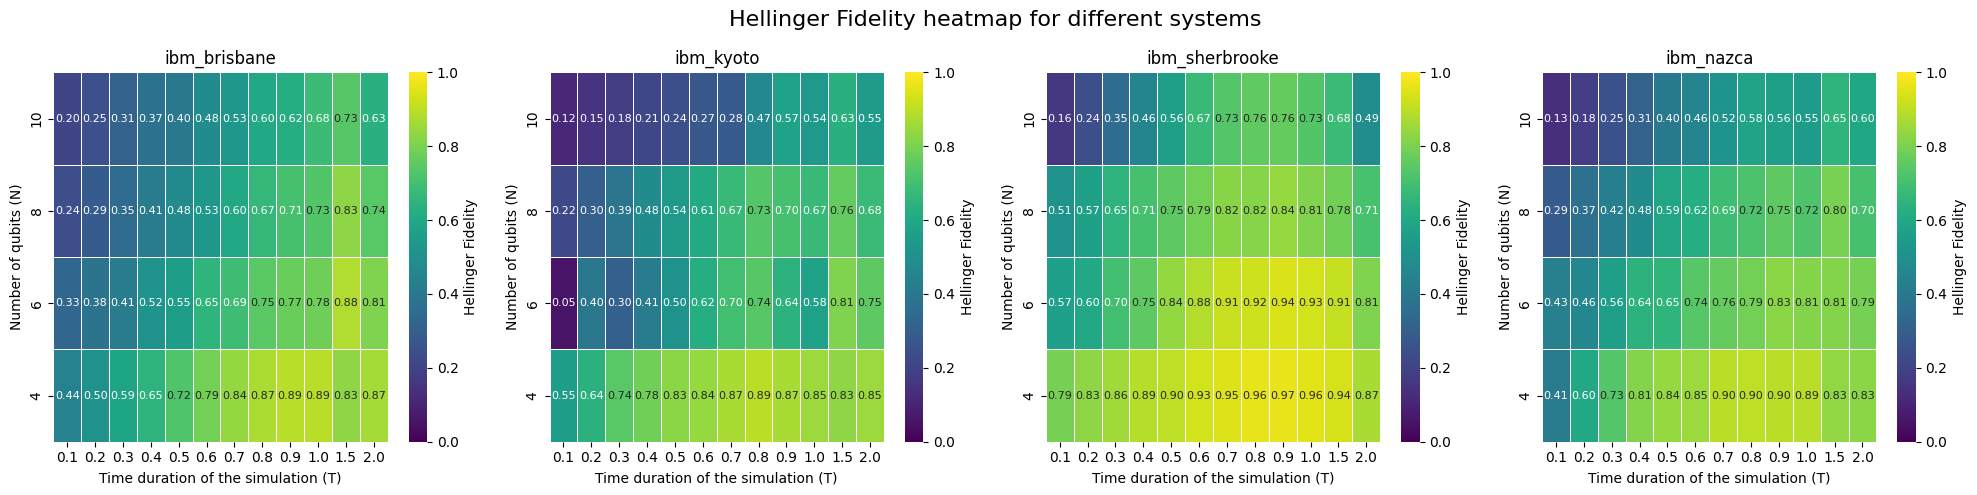

In [501]:
# Plot grid of 1x4 heatmaps
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    sns.heatmap(hf_heatmap_datas[systems[i]], 
                cmap='viridis', 
                linewidths=0.5, 
                annot=True, 
                fmt=".2f", 
                cbar_kws={'label': 'Hellinger Fidelity'}, 
                annot_kws={"size": 8}, 
                ax=ax,
                vmin=0, 
                vmax=1
                )
    
    ax.set_title(f'{systems[i]}')
    ax.set_xlabel('Time duration of the simulation (T)')
    ax.set_ylabel('Number of qubits (N)')

plt.suptitle('Hellinger Fidelity heatmap for different systems', fontsize=16)
plt.tight_layout()
plt.show()

### Total Variational Distance

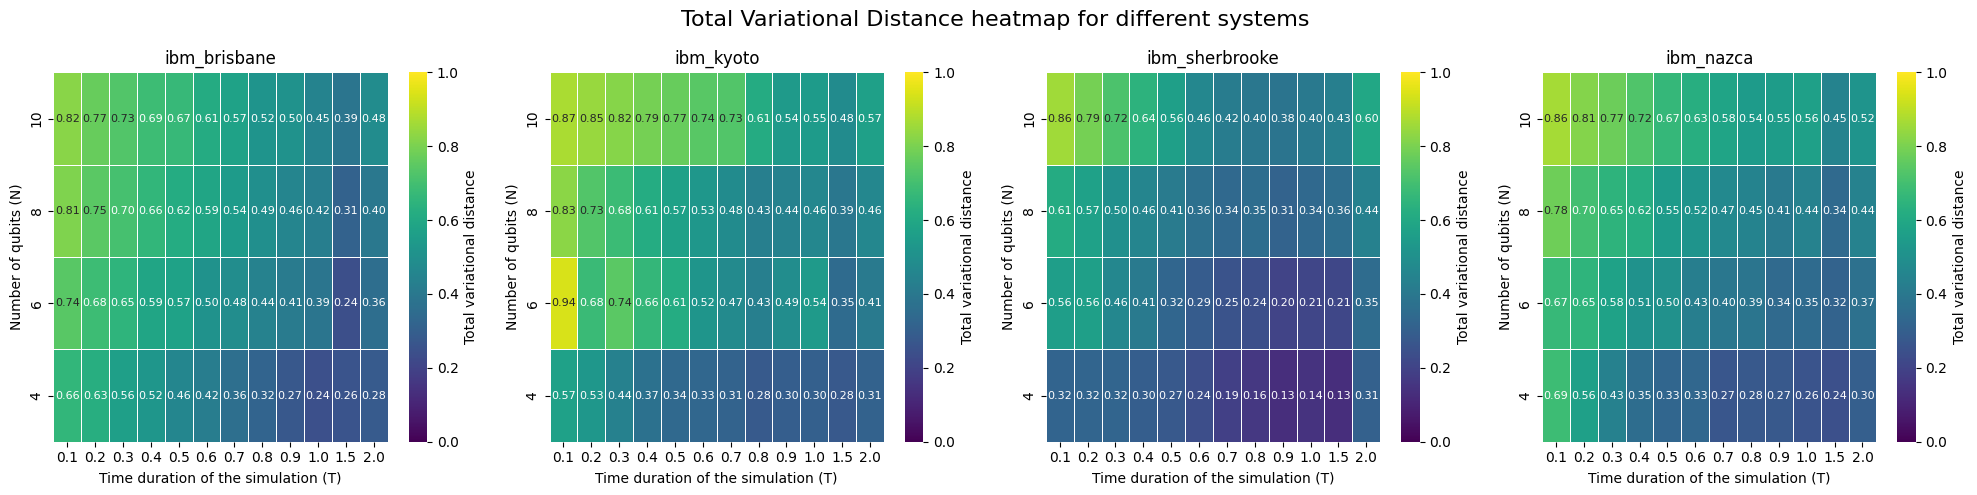

In [502]:
# Plot grid of 1x4 heatmaps
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    sns.heatmap(tv_heatmap_datas[systems[i]], 
                cmap='viridis', 
                linewidths=0.5, 
                annot=True, 
                fmt=".2f", 
                cbar_kws={'label': 'Total variational distance'}, 
                annot_kws={"size": 8}, ax=ax,
                vmin=0, 
                vmax=1
                )
    
    ax.set_title(f'{systems[i]}')
    ax.set_xlabel('Time duration of the simulation (T)')
    ax.set_ylabel('Number of qubits (N)')

plt.suptitle('Total Variational Distance heatmap for different systems', fontsize=16)
plt.tight_layout()
plt.show()

## ZNE plots

### ZNE study

In [504]:
dfs = {}
dfs['ibm_brisbane'] = data[data['System'] == 'ibm_brisbane'][['N','T','ZNE HF % change','ZNE TV % change']]
dfs['ibm_kyoto'] = data[data['System'] == 'ibm_kyoto'][['N','T','ZNE HF % change','ZNE TV % change']]
dfs['ibm_sherbrooke'] = data[data['System'] == 'ibm_sherbrooke'][['N','T','ZNE HF % change','ZNE TV % change']]
dfs['ibm_nazca'] = data[data['System'] == 'ibm_nazca'][['N','T','ZNE HF % change','ZNE TV % change']]

#### Percentage difference

In [505]:
systems = list(dfs.keys())

hf_heatmap_datas = {}
tv_heatmap_datas = {}

# Pivot the data to create a 2D heatmap
for system,df in dfs.items():
    hf_heatmap_data = df.pivot_table(index='N', columns='T', values='ZNE HF % change').sort_values(by='N', ascending=False)
    tv_heatmap_data = df.pivot_table(index='N', columns='T', values='ZNE TV % change').sort_values(by='N', ascending=False)
    hf_heatmap_datas[system] = hf_heatmap_data
    tv_heatmap_datas[system] = tv_heatmap_data

In [506]:
hf_heatmap_datas['ibm_brisbane']

T         0.1        0.2        0.3       0.4       0.5       0.6       0.7  \
N                                                                             
10  26.294063  17.663208  12.833589  5.703573  1.641380  0.516396 -0.384215   
8   27.975519  23.387890  13.633760  5.430765  2.897356 -0.711937 -3.870289   
6   27.692374  22.858440  15.686599  7.406846  1.535168  0.739862 -3.201467   
4   33.631478  17.504046  14.322539  0.260336 -1.112154  5.073102 -1.636851   

T        0.8        0.9       1.0        1.5       2.0  
N                                                       
10 -0.253180  -1.815160  0.292191  -0.117526  1.391623  
8  -4.156242  -4.028735 -2.914441   0.845592  1.933296  
6  -4.287486  -3.195211 -3.153394   0.029182  0.973379  
4  -8.423863 -13.120167 -8.649752 -10.095315 -0.211896

In [507]:
hf_heatmap_datas['ibm_kyoto']

T         0.1        0.2        0.3        0.4       0.5       0.6       0.7  \
N                                                                              
10  46.024871  32.844496  12.384011  -0.191883 -1.086223 -2.849814 -4.287059   
8   31.541722  25.901605  18.739896  14.219016  4.970140  3.639770  3.372817   
6  -16.128118  26.790008  12.039876  -1.297066  1.097953  3.936682  0.288984   
4   12.355520  11.097034   7.341985   9.596579  8.552423  5.469203  4.344564   

T        0.8       0.9       1.0       1.5       2.0  
N                                                     
10 -4.473099 -1.906047 -1.826532  0.661338  0.952660  
8   3.519359  3.337825  1.394163  0.752548  3.747762  
6   3.806243 -2.486577 -7.265665 -0.952105  6.533758  
4   5.754868  4.284414  3.869162  0.780451  0.833659

In [508]:
hf_heatmap_datas['ibm_nazca']

T         0.1        0.2        0.3        0.4       0.5       0.6       0.7  \
N                                                                              
10  34.760052  23.334067  14.585896  10.003671  4.435983  1.560440 -0.667972   
8   24.537791  20.782917  12.716391   7.964392  6.031510  2.966258  2.585368   
6   20.499246  19.143563  13.616807  13.726774  5.186593  6.031121  0.228957   
4   19.394469  13.768647   7.438533   1.532589 -0.491059  2.725076  1.670258   

T        0.8       0.9       1.0       1.5       2.0  
N                                                     
10 -0.300486 -0.181071  0.483684 -0.773013  0.906631  
8   2.147504  3.234371 -1.260075  0.388341  1.899949  
6  -1.754837 -0.110532 -0.494790  5.625723  4.549609  
4   1.936414  1.499721  3.439773  2.612736  6.825836

In [509]:
hf_heatmap_datas['ibm_sherbrooke']

T         0.1        0.2        0.3       0.4       0.5       0.6       0.7  \
N                                                                             
10  17.142247   9.469613   4.782568  3.779861  2.346175  3.279213  2.377695   
8   16.185747  12.217794   9.719011  6.913486  3.448318  0.923159  0.623846   
6   25.728223  18.962817  13.802925  8.787448  4.013194  0.943565 -0.355257   
4   15.977001  13.898383   9.693060  6.704785  3.713025  0.383980 -0.386864   

T        0.8       0.9       1.0       1.5        2.0  
N                                                      
10  1.879441  2.278338  0.764255  0.085325  -0.284921  
8  -0.260060  0.007326  0.969952  2.481046   2.623508  
6  -0.150793  0.607648  0.235577 -0.583460  -0.601704  
4   0.097297  1.000374  0.916274  2.668972 -15.629578

## FFZNE plots

In [510]:
dfs = {}
dfs['ibm_brisbane'] = data[data['System'] == 'ibm_brisbane'][['N','T','FFZNE HF % change','FFZNE TV % change']]
dfs['ibm_kyoto'] = data[data['System'] == 'ibm_kyoto'][['N','T','FFZNE HF % change','FFZNE TV % change']]
dfs['ibm_sherbrooke'] = data[data['System'] == 'ibm_sherbrooke'][['N','T','FFZNE HF % change','FFZNE TV % change']]
dfs['ibm_nazca'] = data[data['System'] == 'ibm_nazca'][['N','T','FFZNE HF % change','FFZNE TV % change']]

systems = list(dfs.keys())

hf_heatmap_datas = {}
tv_heatmap_datas = {}

# Pivot the data to create a 2D heatmap
for system,df in dfs.items():
    hf_heatmap_data = df.pivot_table(index='N', columns='T', values='FFZNE HF % change').sort_values(by='N', ascending=False)
    tv_heatmap_data = df.pivot_table(index='N', columns='T', values='FFZNE TV % change').sort_values(by='N', ascending=False)
    hf_heatmap_datas[system] = hf_heatmap_data
    tv_heatmap_datas[system] = tv_heatmap_data

In [102]:
hf_heatmap_datas[system]

T        0.1       0.2       0.3       0.4       0.5       0.6       0.7  \
N                                                                          
10  0.438688  0.092144 -0.120206 -0.259671 -0.416227 -0.481097 -0.579211   
8  -0.124627 -0.152690 -0.259033 -0.345030 -0.405846 -0.461963 -0.479460   
6  -0.351781 -0.390785 -0.410405 -0.428456 -0.476156 -0.484642 -0.530958   
4  -0.361719 -0.380639 -0.423465 -0.447699 -0.480878 -0.510545 -0.518901   

T        0.8       0.9       1.0       1.5       2.0  
N                                                     
10 -0.571450 -0.649128 -0.619918 -0.562770 -0.497024  
8  -0.542409 -0.528152 -0.603724 -0.534348 -0.472381  
6  -0.547781 -0.522834 -0.530139 -0.517506 -0.488258  
4  -0.531657 -0.524175 -0.510872 -0.527786 -0.513082

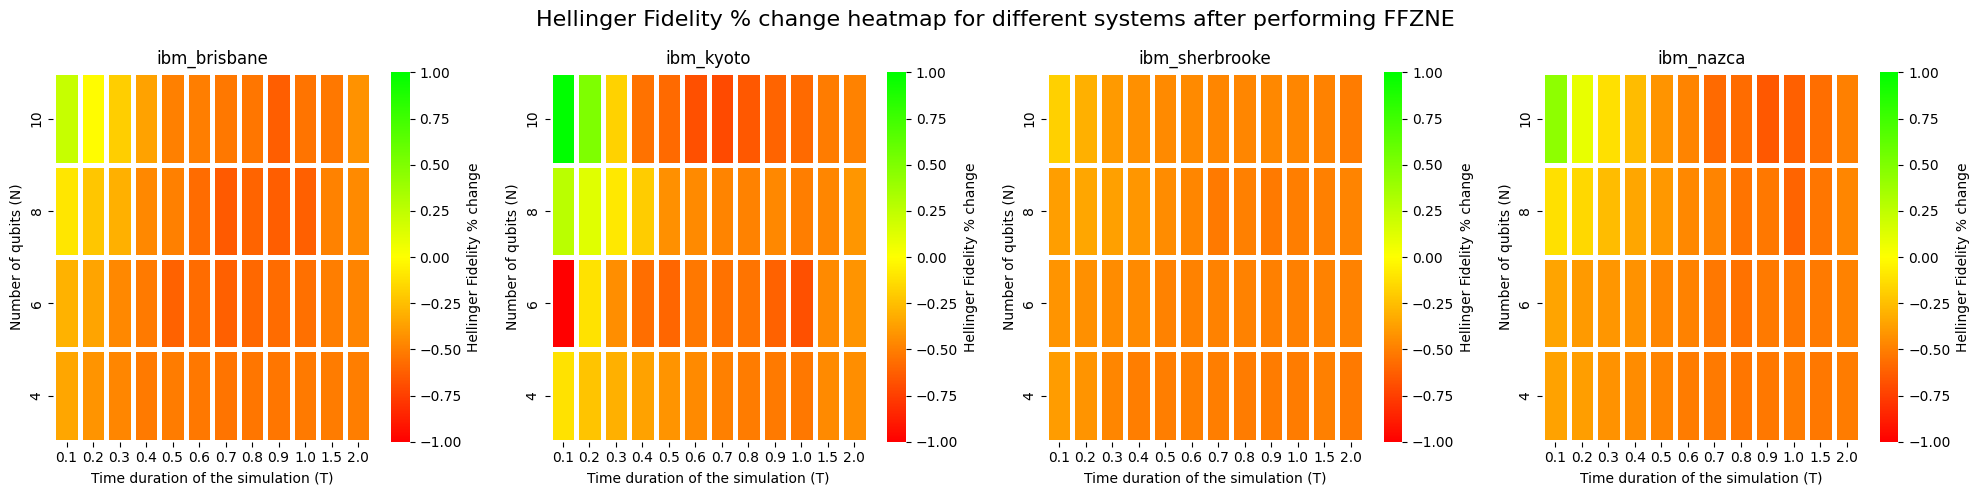

In [103]:
from matplotlib.colors import LinearSegmentedColormap

# Plot grid of 1x4 heatmaps
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Define custom colormap
colors = [(1, 0, 0), (1, 1, 0), (0, 1, 0)]  # red -> white -> green
cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)

for i, ax in enumerate(axes.flat):
    sns.heatmap(hf_heatmap_datas[systems[i]], 
                cmap=cmap, 
                linewidths=2.5, 
                fmt=".2f", 
                cbar_kws={'label': 'Hellinger Fidelity % change'}, 
                ax=ax,
                vmin=-1,
                vmax=1
                )
    
    ax.set_title(f'{systems[i]}')
    ax.set_xlabel('Time duration of the simulation (T)')
    ax.set_ylabel('Number of qubits (N)')

plt.suptitle('Hellinger Fidelity % change heatmap for different systems after performing FFZNE', fontsize=16)
plt.tight_layout()
plt.show()

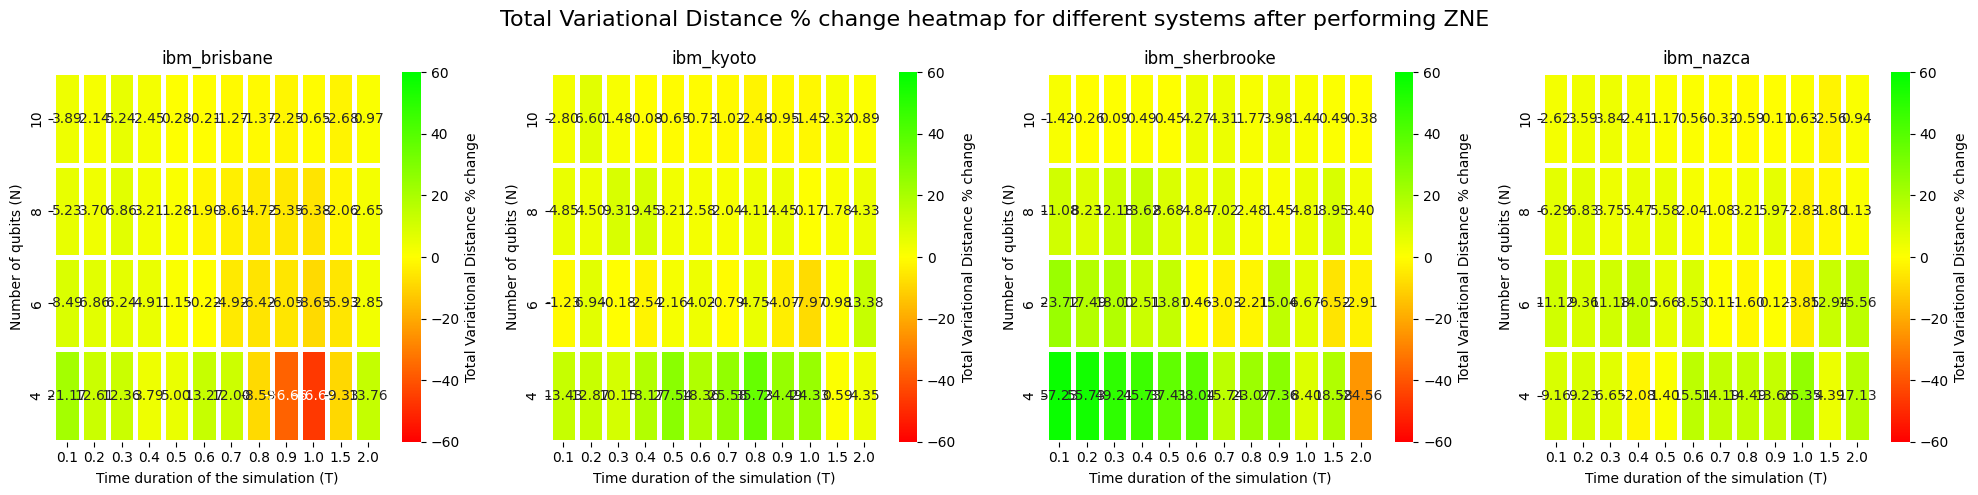

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Plot grid of 1x4 heatmaps
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Define custom colormap
colors = [(1, 0, 0), (1, 1, 0), (0, 1, 0)]  # red -> white -> green
cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)

for i, ax in enumerate(axes.flat):
    sns.heatmap(tv_heatmap_datas[systems[i]], 
                cmap=cmap, 
                linewidths=2.5, 
                fmt=".2f", 
                cbar_kws={'label': 'Total Variational Distance % change'}, 
                ax=ax,
                annot=True,
                vmin=-60,
                vmax=60
                )
    
    ax.set_title(f'{systems[i]}')
    ax.set_xlabel('Time duration of the simulation (T)')
    ax.set_ylabel('Number of qubits (N)')

plt.suptitle('Total Variational Distance % change heatmap for different systems after performing ZNE', fontsize=16)
plt.tight_layout()
plt.show()

## RBZNE plots

## Comparative study

### Line plot for values

In [511]:
import matplotlib.pyplot as plt

def plot_hf_for_system(system, data):
    x_values = list(data['T'].unique())
    y_values = []

    line_mapping = ['Baseline', 'ZNE HF', 'FFZNE HF', 'RBZNE HF']

    for N in [4,6,8,10]:
        hf = data[(data['System'] == system) & (data['N'] == N)]['Noise HF']
        zne_hf = data[(data['System'] == system) & (data['N'] == N)]['ZNE HF']
        ffzne_hf = data[(data['System'] == system) & (data['N'] == N)]['FFZNE HF']
        rbzne_hf = data[(data['System'] == system) & (data['N'] == N)]['RBZNE HF']
        y_values.append([hf, zne_hf, ffzne_hf, rbzne_hf])

    # Create a 2x2 grid of multi-line plots
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    for i in range(2):
        for j in range(2):
            ax = axes[i, j]
            idx = i * 2 + j
            for line_num, y_data in enumerate(y_values[idx]):
                ax.plot(x_values, y_data, marker='o', linestyle='-', label=f'{line_mapping[line_num]}')
            ax.set_xlabel('Time duration of the simulation (T)')
            ax.set_ylabel('Hellinger fidelity')
            ax.set_title(f'N = {idx*2 + 4}')
            ax.grid(True)
            ax.legend()

    plt.suptitle(f'Hellinger fidelity for {system} and different N and methods', fontsize=16)
    plt.tight_layout()
    plt.show()

def plot_tv_for_system(system,data):
    x_values = list(data['T'].unique())
    y_values = []

    line_mapping = ['Baseline', 'ZNE TV', 'FFZNE TV', 'RBZNE TV']

    for N in [4,6,8,10]:
        tv = data[(data['System'] == system) & (data['N'] == N)]['Noise TV']
        zne_tv = data[(data['System'] == system) & (data['N'] == N)]['ZNE TV']
        ffzne_tv = data[(data['System'] == system) & (data['N'] == N)]['FFZNE TV']
        rbzne_tv = data[(data['System'] == system) & (data['N'] == N)]['RBZNE TV']
        y_values.append([tv, zne_tv, ffzne_tv, rbzne_tv])

    # Create a 2x2 grid of multi-line plots
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    for i in range(2):
        for j in range(2):
            ax = axes[i, j]
            idx = i * 2 + j
            for line_num, y_data in enumerate(y_values[idx]):
                ax.plot(x_values, y_data, marker='o', linestyle='-', label=f'{line_mapping[line_num]}')
            ax.set_xlabel('Time duration of the simulation (T)')
            ax.set_ylabel('Total variational distance')
            ax.set_title(f'N = {idx*2 + 4}')
            ax.grid(True)
            ax.legend()

    plt.suptitle(f'Total variational distance for {system} and different N and methods', fontsize=16)
    plt.tight_layout()
    plt.show()

def plot_hf_percentage_change_for_system(system, data):
    x_values = list(data['T'].unique())
    y_values = []

    line_mapping = ['ZNE HF % change', 'FFZNE HF % change', 'RBZNE HF % change']

    for N in [4,6,8,10]:
        zne_hf = data[(data['System'] == system) & (data['N'] == N)]['ZNE HF % change']
        ffzne_hf = data[(data['System'] == system) & (data['N'] == N)]['FFZNE HF % change']
        rbzne_hf = data[(data['System'] == system) & (data['N'] == N)]['RBZNE HF % change']
        y_values.append([zne_hf, ffzne_hf, rbzne_hf])

    # Create a 2x2 grid of multi-line plots
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    for i in range(2):
        for j in range(2):
            ax = axes[i, j]
            idx = i * 2 + j
            for line_num, y_data in enumerate(y_values[idx]):
                ax.plot(x_values, y_data, marker='o', linestyle='-', label=f'{line_mapping[line_num]}')
            ax.axhline(y=0, color='red', linestyle='--', label='Baseline')
            ax.set_xlabel('Time duration of the simulation (T)')
            ax.set_ylabel('Hellinger fidelity')
            ax.set_title(f'N = {idx*2 + 4}')
            ax.grid(True)
            ax.legend()

    plt.suptitle(f'Hellinger fidelity for {system} and different N and methods', fontsize=16)
    plt.tight_layout()
    plt.show()

def plot_tv_percentage_change_for_system(system,data):
    x_values = list(data['T'].unique())
    y_values = []

    line_mapping = ['ZNE TV % change', 'FFZNE TV % change', 'RBZNE TV % change']

    for N in [4,6,8,10]:
        zne_tv = data[(data['System'] == system) & (data['N'] == N)]['ZNE TV % change']
        ffzne_tv = data[(data['System'] == system) & (data['N'] == N)]['FFZNE TV % change']
        rbzne_tv = data[(data['System'] == system) & (data['N'] == N)]['RBZNE TV % change']
        y_values.append([zne_tv, ffzne_tv, rbzne_tv])

    # Create a 2x2 grid of multi-line plots
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    for i in range(2):
        for j in range(2):
            ax = axes[i, j]
            idx = i * 2 + j
            for line_num, y_data in enumerate(y_values[idx]):
                ax.plot(x_values, y_data, marker='o', linestyle='-', label=f'{line_mapping[line_num]}')
            ax.axhline(y=0, color='red', linestyle='--', label='Baseline')
            ax.set_xlabel('Time duration of the simulation (T)')
            ax.set_ylabel('Total variational distance')
            ax.set_title(f'N = {idx*2 + 4}')
            ax.grid(True)
            ax.legend()

    plt.suptitle(f'Total variational distance for {system} and different N and methods', fontsize=16)
    plt.tight_layout()
    plt.show()

#### Hellinger fidelity

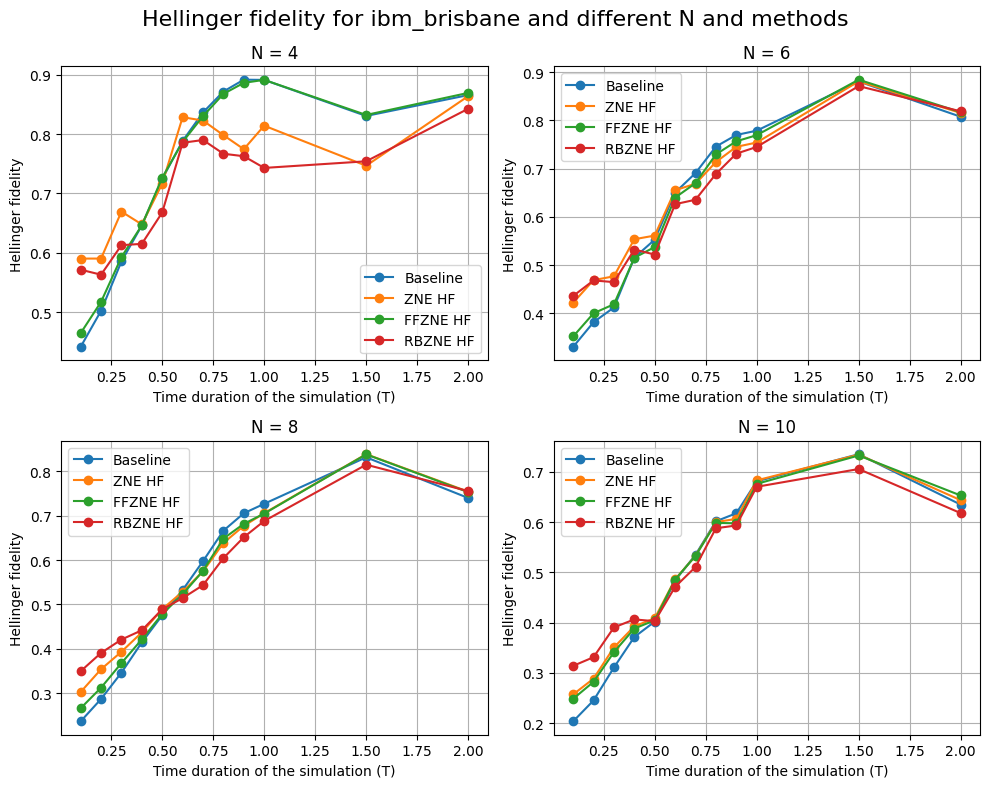

In [440]:
plot_hf_for_system("ibm_brisbane", data)

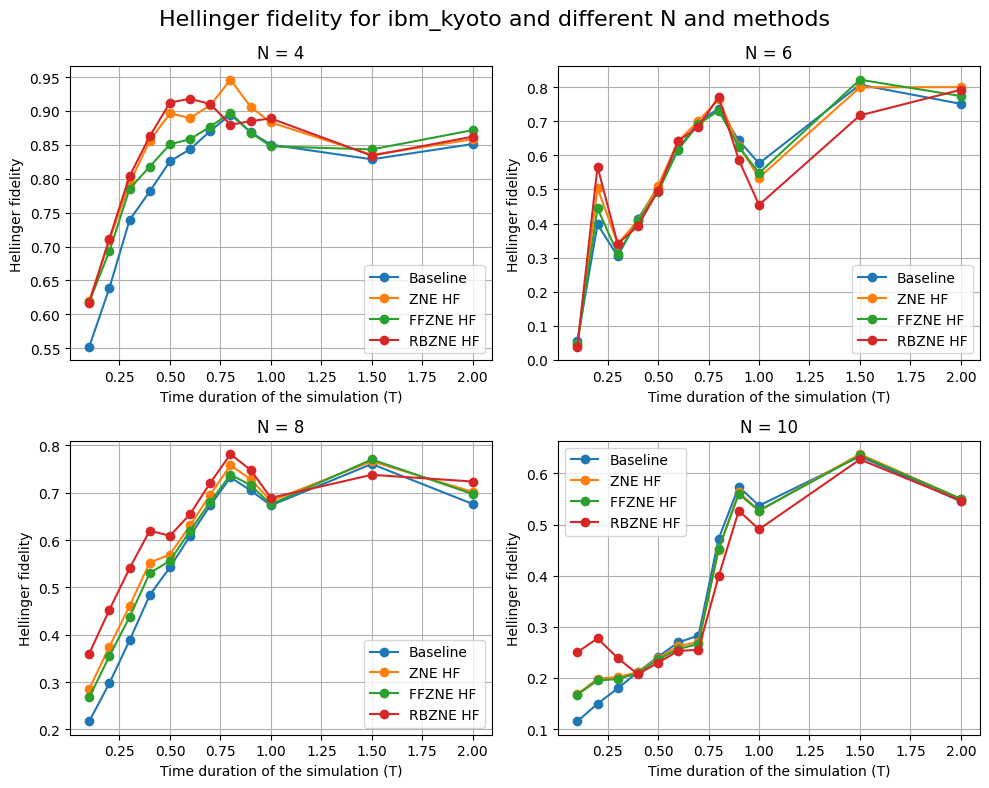

In [441]:
plot_hf_for_system("ibm_kyoto", data)

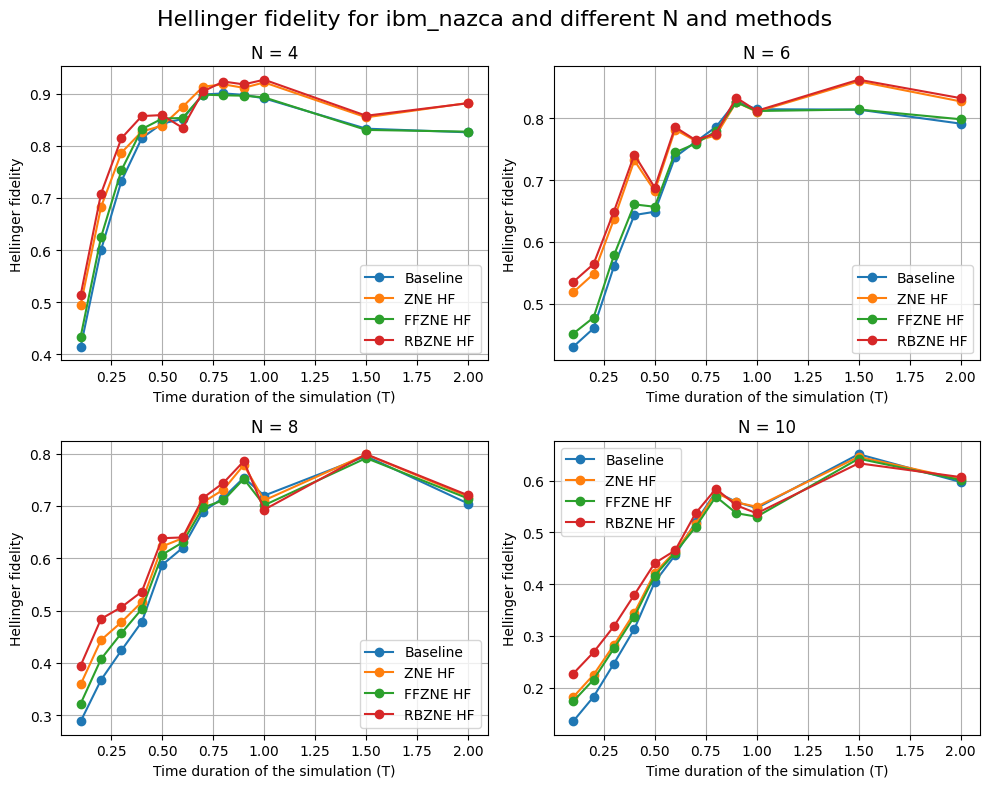

In [442]:
plot_hf_for_system("ibm_nazca", data)

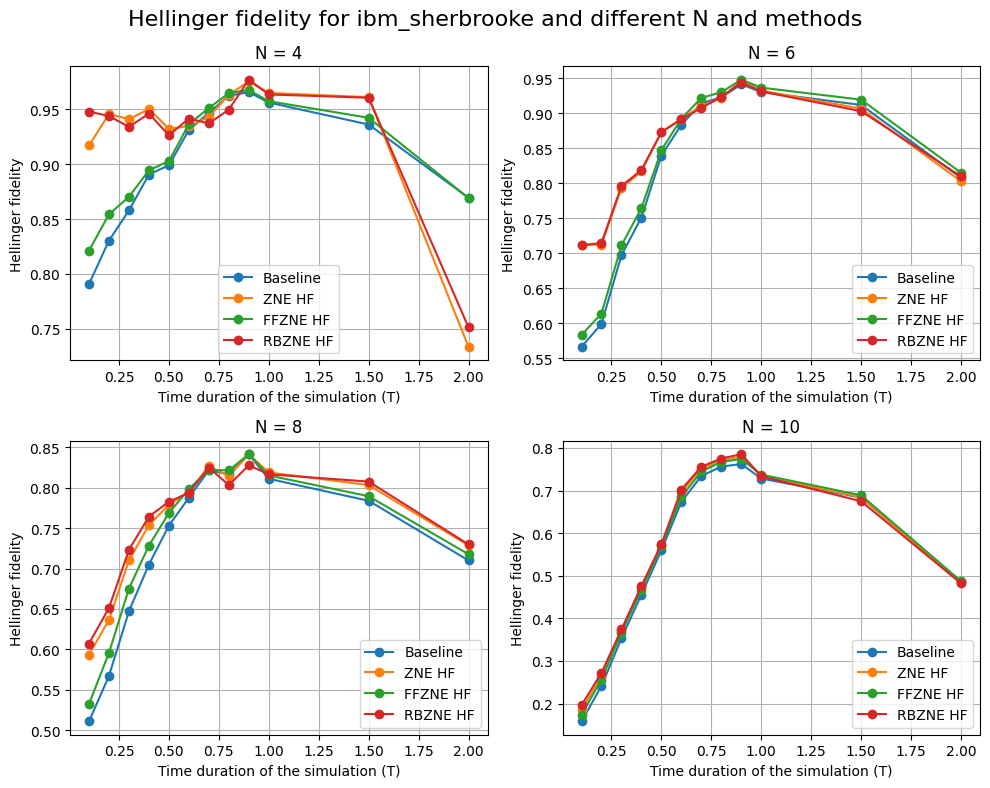

In [443]:
plot_hf_for_system("ibm_sherbrooke", data)

#### Total Variational Distance

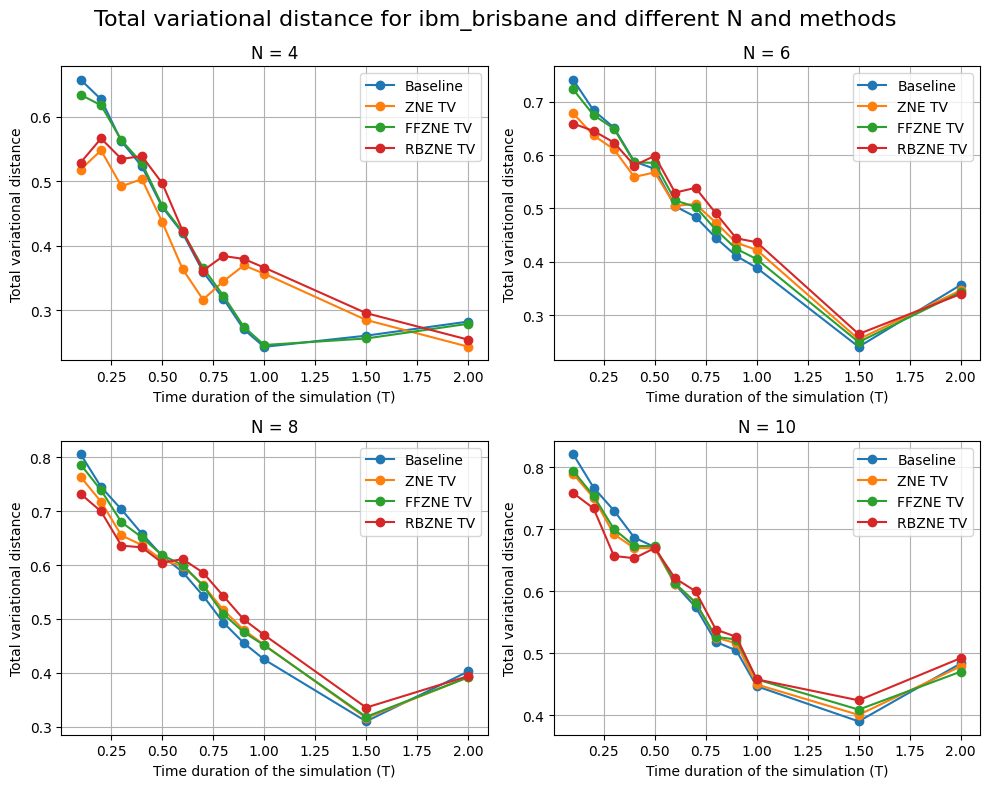

In [444]:
plot_tv_for_system("ibm_brisbane", data)

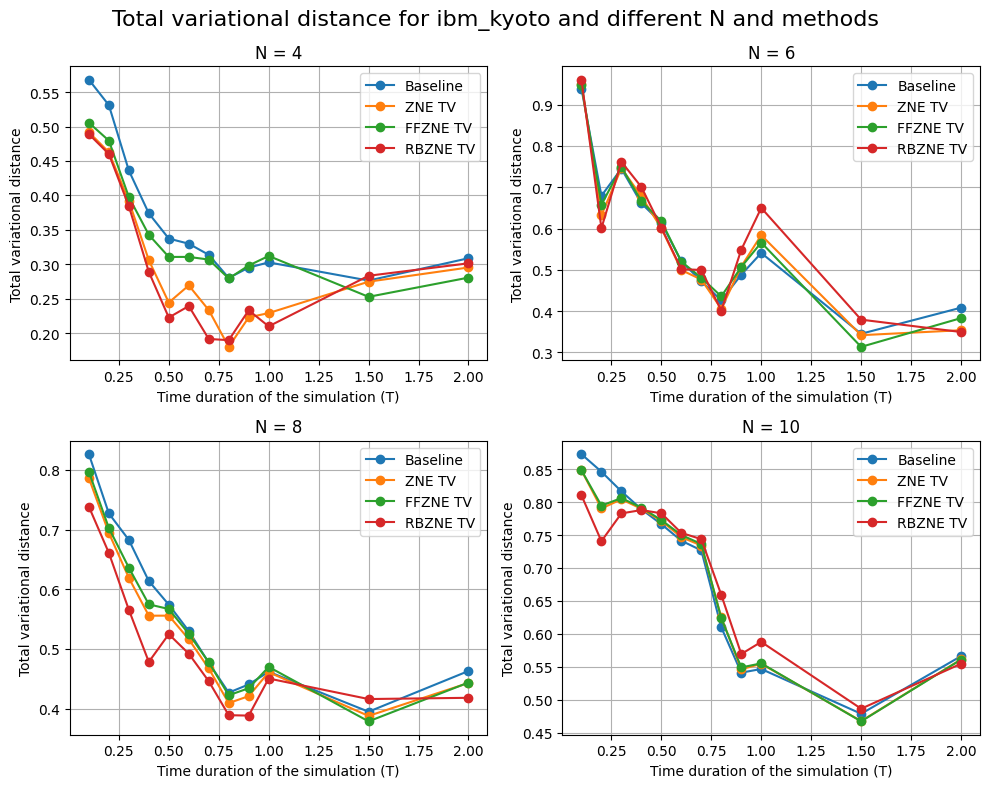

In [445]:
plot_tv_for_system("ibm_kyoto", data)

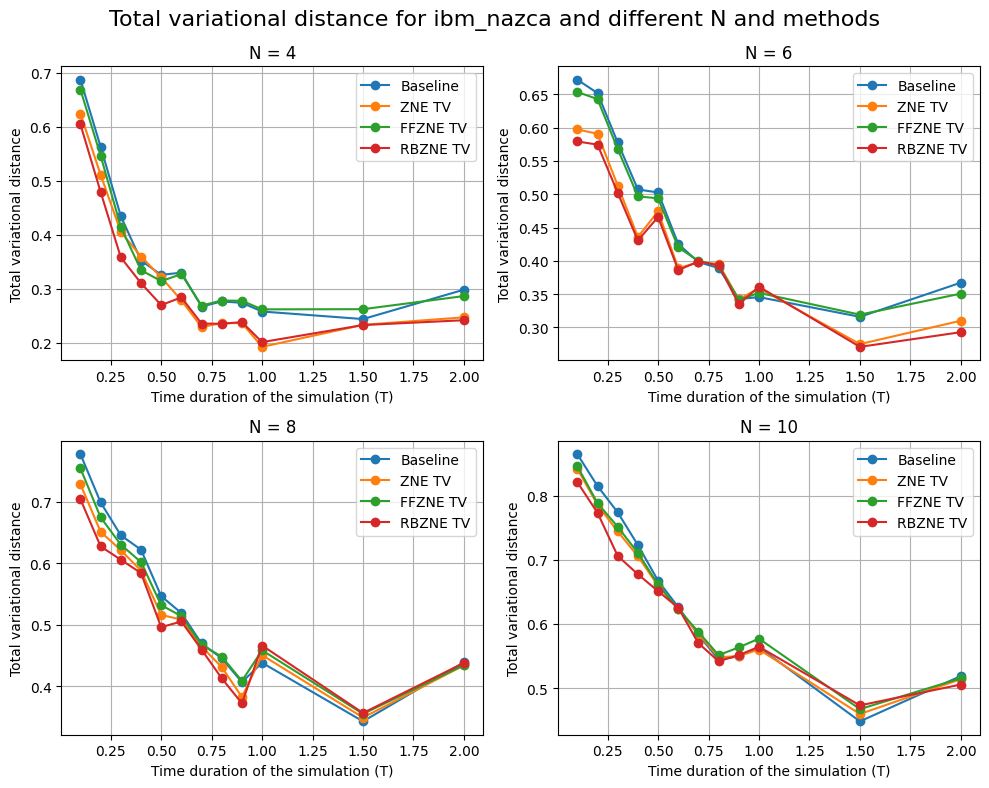

In [446]:
plot_tv_for_system("ibm_nazca", data)

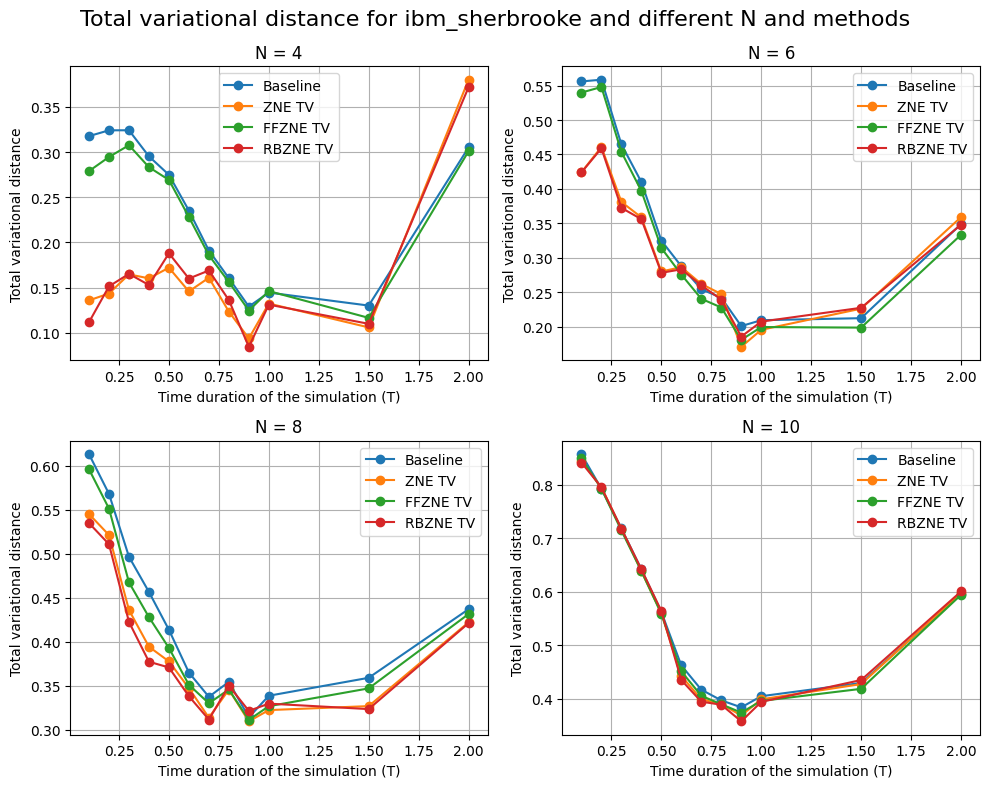

In [447]:
plot_tv_for_system("ibm_sherbrooke", data)

#### Hellinger percentage change

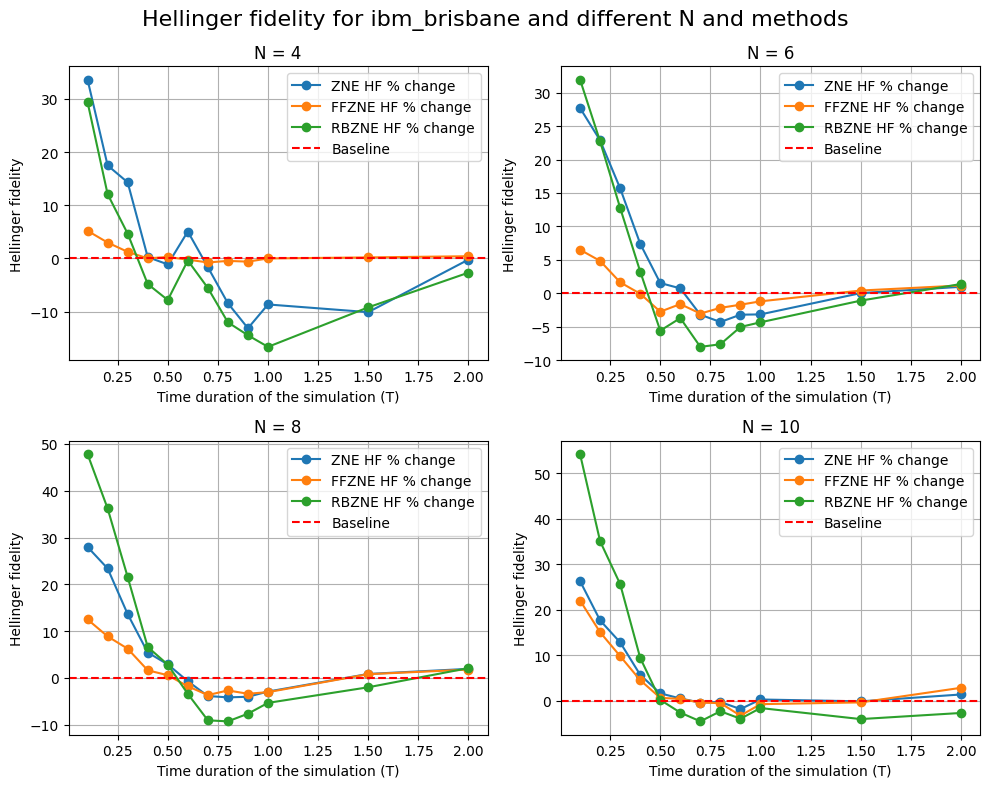

In [448]:
plot_hf_percentage_change_for_system("ibm_brisbane", data)

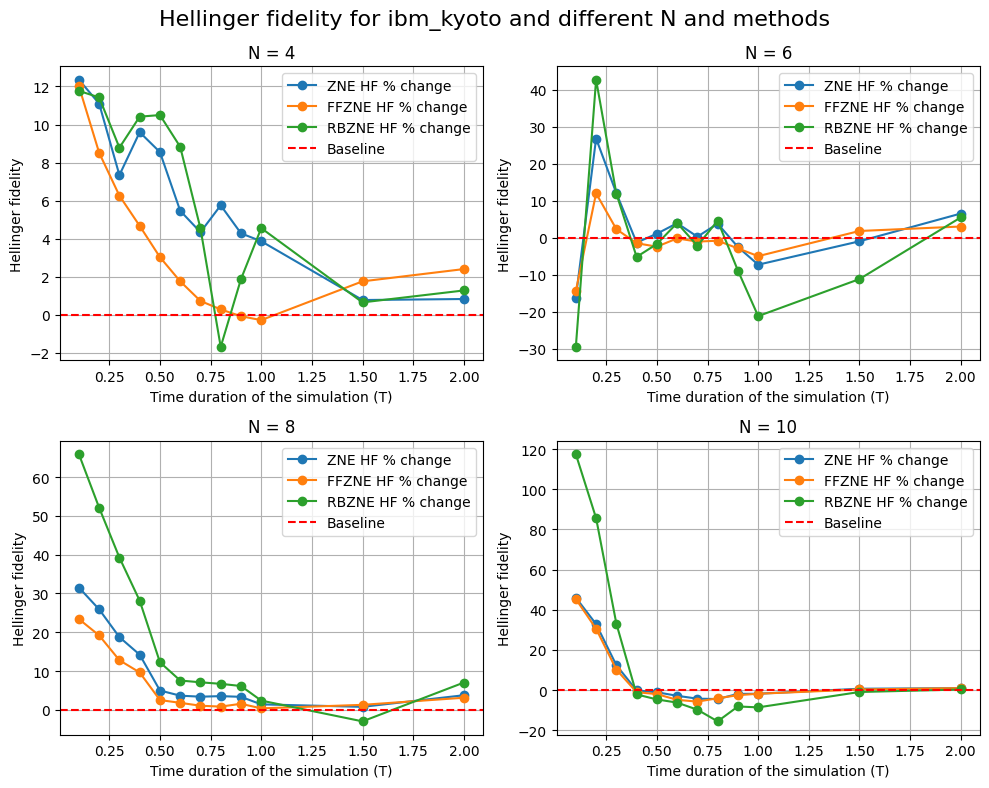

In [449]:
plot_hf_percentage_change_for_system("ibm_kyoto", data)

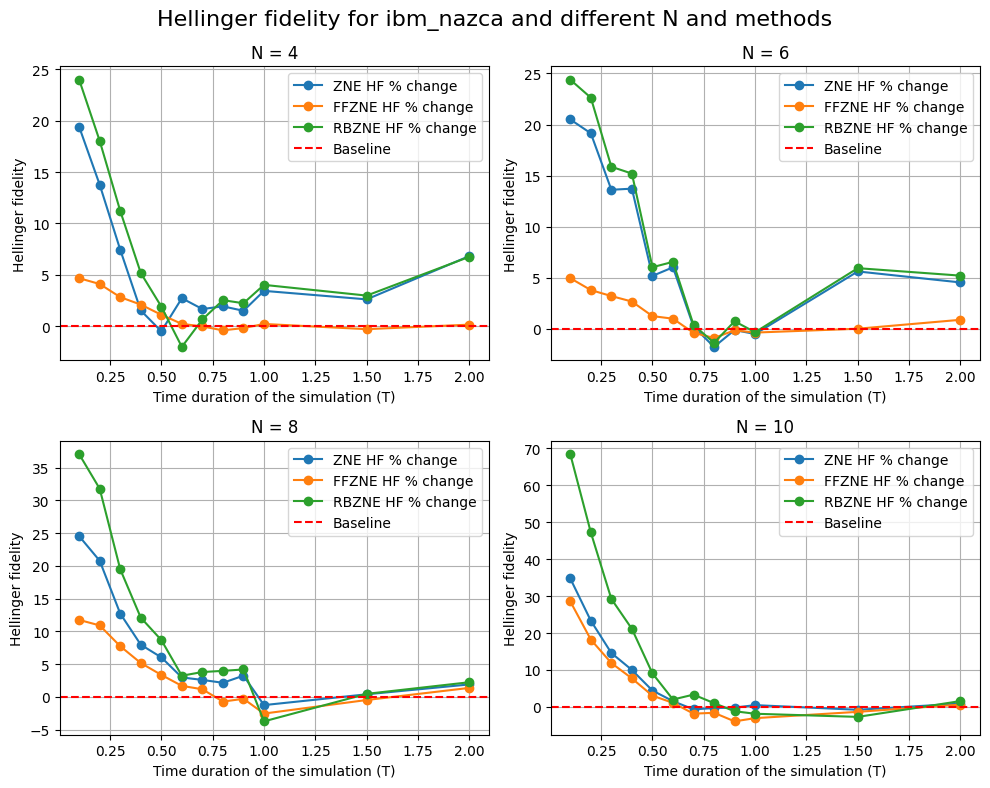

In [450]:
plot_hf_percentage_change_for_system("ibm_nazca", data)

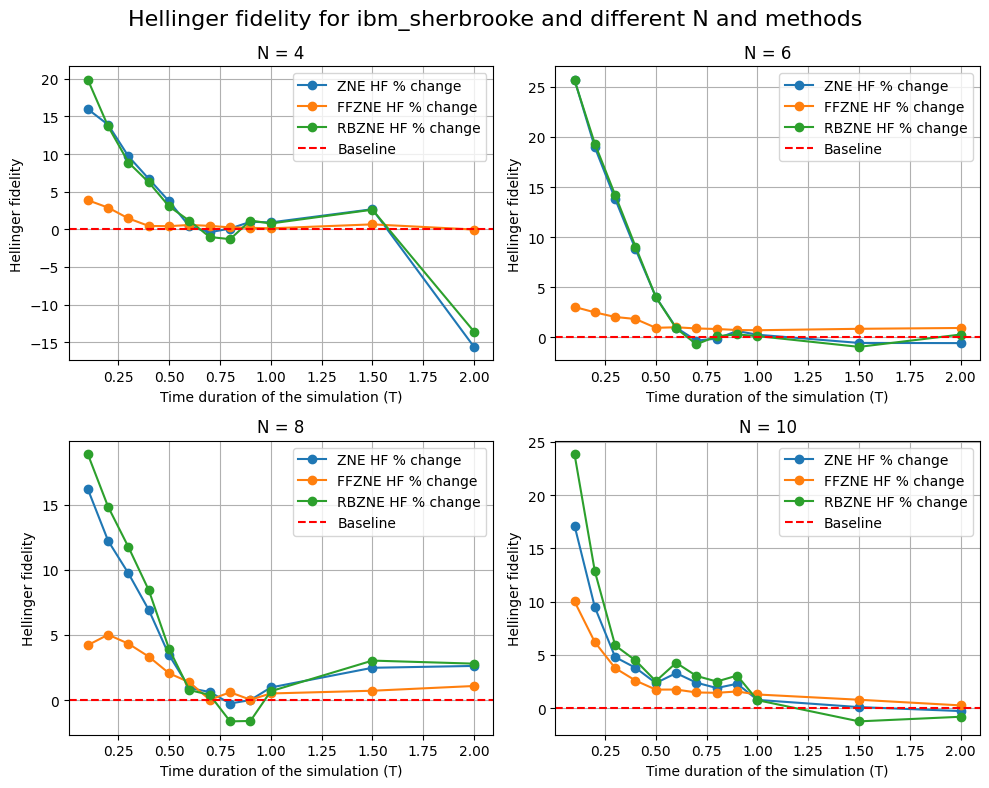

In [451]:
plot_hf_percentage_change_for_system("ibm_sherbrooke", data)

#### Total Variational Distance Percentage change

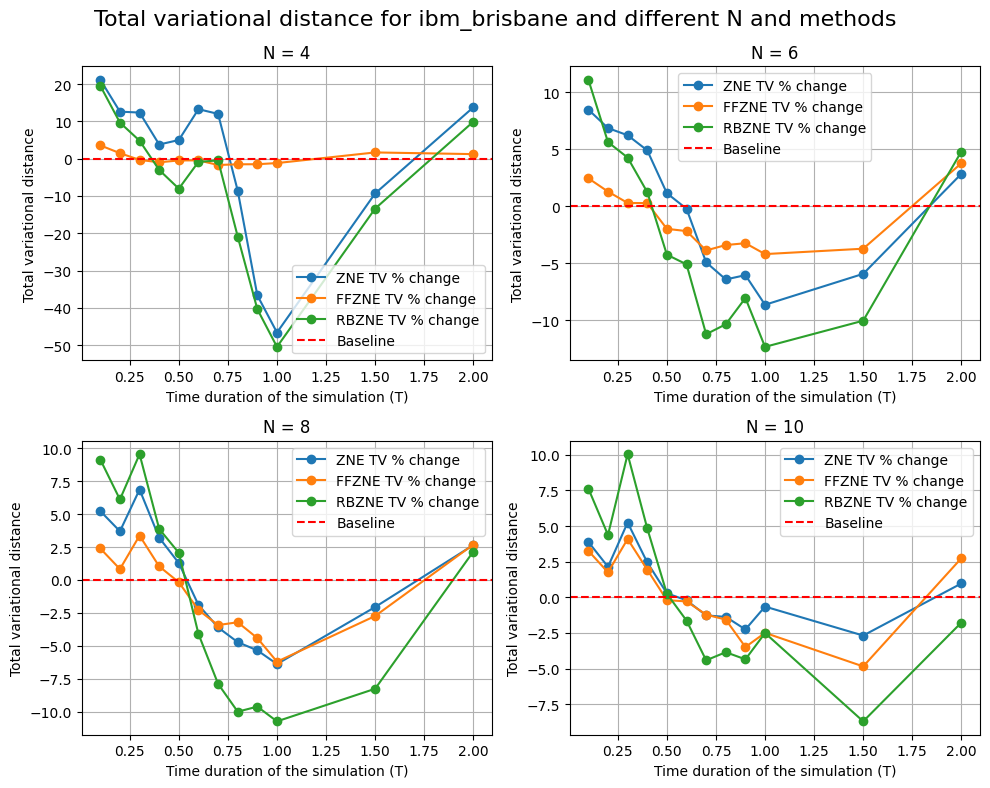

In [452]:
plot_tv_percentage_change_for_system("ibm_brisbane", data)

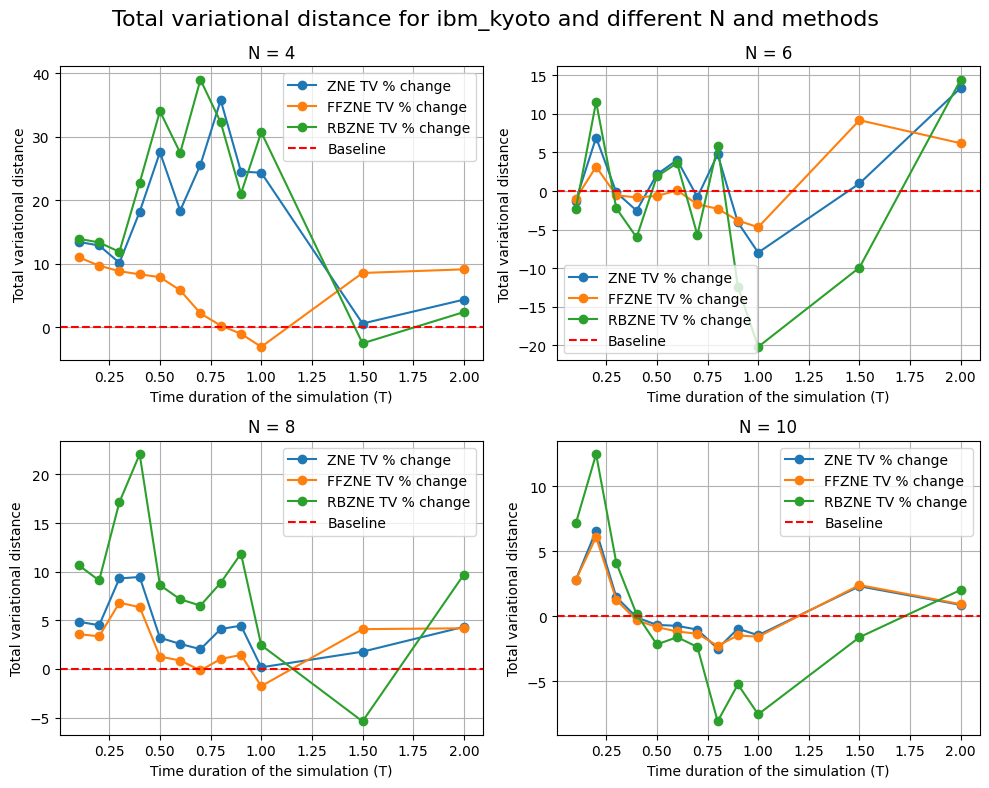

In [453]:
plot_tv_percentage_change_for_system("ibm_kyoto", data)

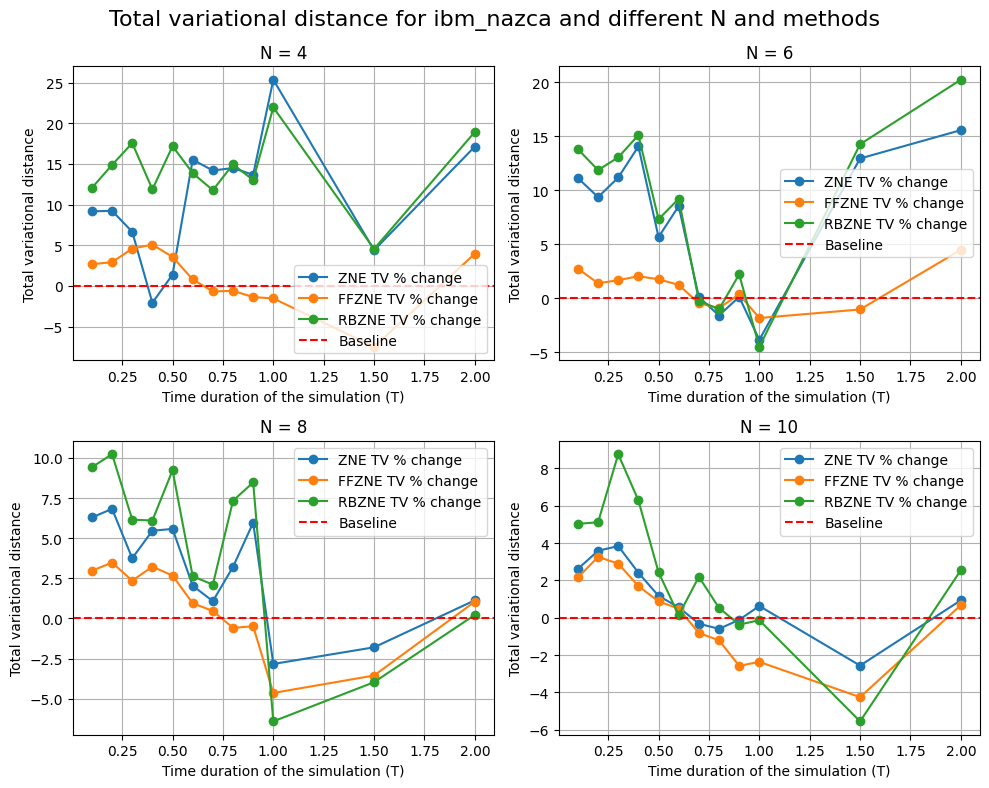

In [454]:
plot_tv_percentage_change_for_system("ibm_nazca", data)

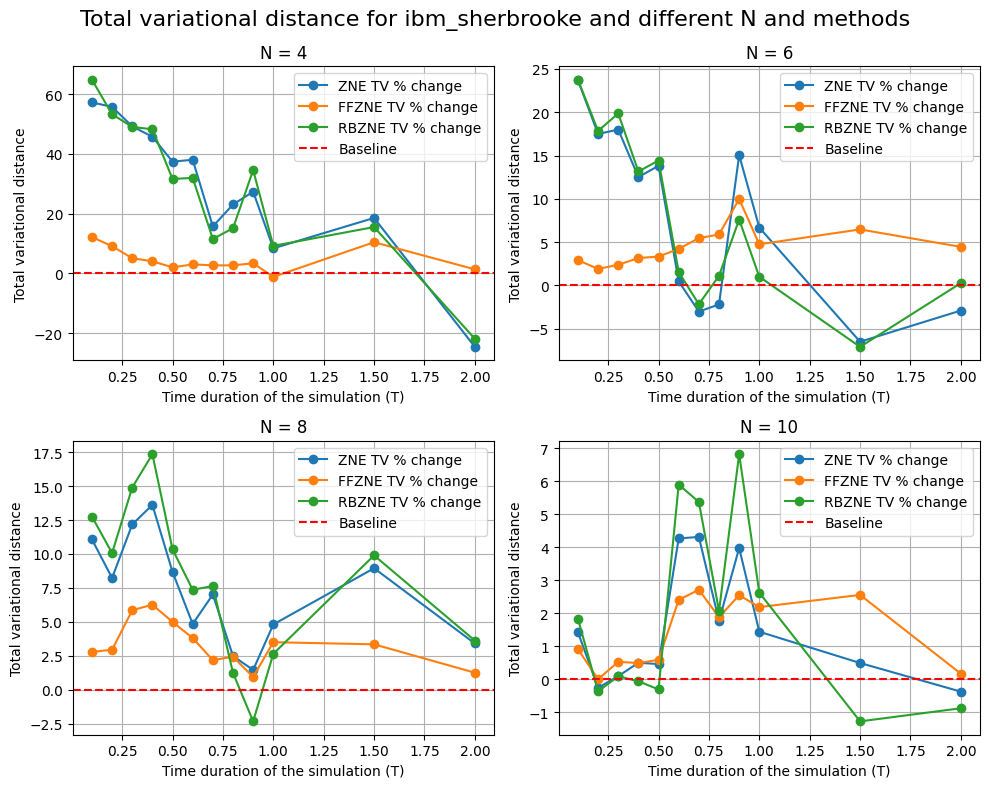

In [455]:
plot_tv_percentage_change_for_system("ibm_sherbrooke", data)

### Geometric mean

#### Geometric mean for each system and N

In [288]:
def get_geometric_means_for_system_and_N(system, data, dist):
    # Calculate the geometric mean for each N
    zne_geometric_means = list(map(lambda x: np.prod(1 + x/100)**(1/len(x)), [data[(data['System'] == system) & (data['N'] == 4)][f'ZNE {dist} % change'],
                                                                              data[(data['System'] == system) & (data['N'] == 6)][f'ZNE {dist} % change'],
                                                                                data[(data['System'] == system) & (data['N'] == 8)][f'ZNE {dist} % change'],
                                                                                data[(data['System'] == system) & (data['N'] == 10)][f'ZNE {dist} % change']]))

    ffzne_geomtric_means = list(map(lambda x: np.prod(1 + x/100)**(1/len(x)), [data[(data['System'] == system) & (data['N'] == 4)][f'FFZNE {dist} % change'],
                                                                              data[(data['System'] == system) & (data['N'] == 6)][f'FFZNE {dist} % change'],
                                                                                data[(data['System'] == system) & (data['N'] == 8)][f'FFZNE {dist} % change'],
                                                                                data[(data['System'] == system) & (data['N'] == 10)][f'FFZNE {dist} % change']]))

    rbzne_geometric_means = list(map(lambda x: np.prod(1 + x/100)**(1/len(x)), [data[(data['System'] == system) & (data['N'] == 4)][f'RBZNE {dist} % change'],
                                                                                data[(data['System'] == system) & (data['N'] == 6)][f'RBZNE {dist} % change'],
                                                                                data[(data['System'] == system) & (data['N'] == 8)][f'RBZNE {dist} % change'],
                                                                                data[(data['System'] == system) & (data['N'] == 10)][f'RBZNE {dist} % change']]))

    return [zne_geometric_means, ffzne_geomtric_means, rbzne_geometric_means]

##### Hellinger fidelity

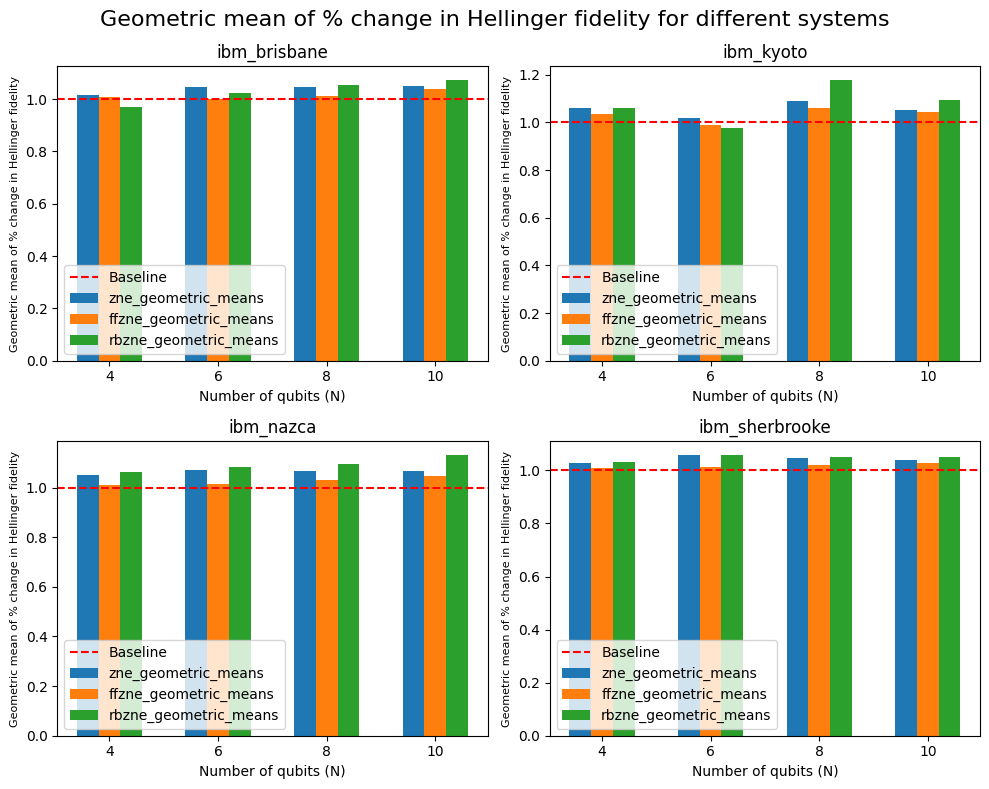

In [289]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = [4,6,8,10]
ibm_brisbane_means = get_geometric_means_for_system_and_N('ibm_brisbane', data,'HF')
ibm_kyoto_means = get_geometric_means_for_system_and_N('ibm_kyoto', data,'HF')
ibm_nazca_means = get_geometric_means_for_system_and_N('ibm_nazca', data,'HF')
ibm_sherbrooke_means = get_geometric_means_for_system_and_N('ibm_sherbrooke', data,'HF')

# Define the width of the bars
bar_width = 0.2

# Set the position of the bars on the x-axis
x = np.arange(len(categories))

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array to iterate over it
axes = axes.flatten()

group_labels = ['zne_geometric_means', 'ffzne_geometric_means', 'rbzne_geometric_means']
plot_labels = ['ibm_brisbane', 'ibm_kyoto', 'ibm_nazca', 'ibm_sherbrooke']   

# Plot each multi-bar graph in a subplot
for i, ax in enumerate(axes):
    if i == 0:
        values = ibm_brisbane_means

    elif i == 1:
        values = ibm_kyoto_means

    elif i == 2:
        values = ibm_nazca_means

    else:
        values = ibm_sherbrooke_means

        
    for j, v in enumerate(values):
        ax.bar(x + j * bar_width, v, width=bar_width, label=f'{group_labels[j]}')
        
    ax.set_xlabel('Number of qubits (N)')
    ax.set_ylabel('Geometric mean of % change in Hellinger fidelity', fontsize=8)
    ax.set_title(f'{plot_labels[i]}')
    ax.set_xticks(x + bar_width / 2 * (len(values) - 1))
    ax.set_xticklabels(categories)
    
    # Draw a horizontal line at y=1
    ax.axhline(y=1, color='red', linestyle='--', label='Baseline')
    ax.legend()

plt.suptitle('Geometric mean of % change in Hellinger fidelity for different systems', fontsize=16)
plt.tight_layout()
plt.show()


##### Total Variational Distance

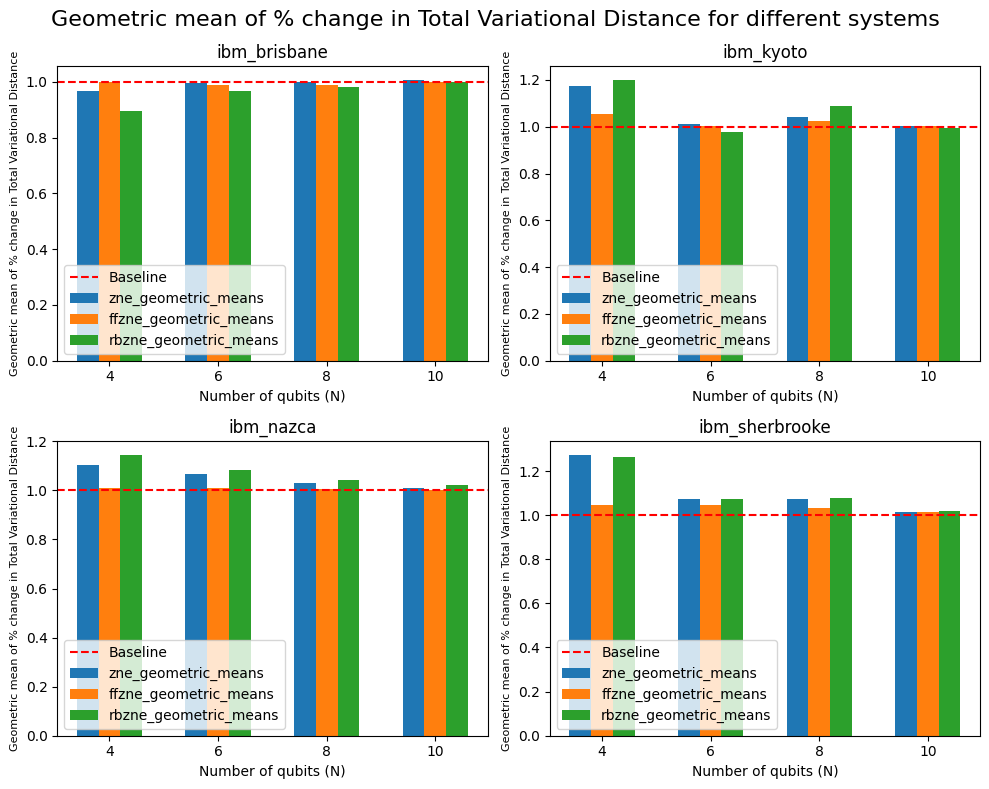

In [290]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = [4,6,8,10]
ibm_brisbane_means = get_geometric_means_for_system_and_N('ibm_brisbane', data,'TV')
ibm_kyoto_means = get_geometric_means_for_system_and_N('ibm_kyoto', data,'TV')
ibm_nazca_means = get_geometric_means_for_system_and_N('ibm_nazca', data,'TV')
ibm_sherbrooke_means = get_geometric_means_for_system_and_N('ibm_sherbrooke', data,'TV')

# Define the width of the bars
bar_width = 0.2

# Set the position of the bars on the x-axis
x = np.arange(len(categories))

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array to iterate over it
axes = axes.flatten()

group_labels = ['zne_geometric_means', 'ffzne_geometric_means', 'rbzne_geometric_means']
plot_labels = ['ibm_brisbane', 'ibm_kyoto', 'ibm_nazca', 'ibm_sherbrooke']   

# Plot each multi-bar graph in a subplot
for i, ax in enumerate(axes):
    if i == 0:
        values = ibm_brisbane_means

    elif i == 1:
        values = ibm_kyoto_means

    elif i == 2:
        values = ibm_nazca_means

    else:
        values = ibm_sherbrooke_means

        
    for j, v in enumerate(values):
        ax.bar(x + j * bar_width, v, width=bar_width, label=f'{group_labels[j]}')
        
    ax.set_xlabel('Number of qubits (N)')
    ax.set_ylabel('Geometric mean of % change in Total Variational Distance', fontsize=8)
    ax.set_title(f'{plot_labels[i]}')
    ax.set_xticks(x + bar_width / 2 * (len(values) - 1))
    ax.set_xticklabels(categories)
    
    # Draw a horizontal line at y=1
    ax.axhline(y=1, color='red', linestyle='--', label='Baseline')
    ax.legend()

plt.suptitle('Geometric mean of % change in Total Variational Distance for different systems', fontsize=16)
plt.tight_layout()
plt.show()


#### Geometric mean for each system

In [280]:
import matplotlib.pyplot as plt

def get_geometric_means_for_dist(dist, data):
    # Calculate the geometric mean for each N

    from functools import reduce
    
    # Calculate the geometric mean for records with system as ibm_brisbane
    brisbane_transformed = list(map(lambda x: 1 + x/100, data[data['System'] == 'ibm_brisbane'][dist]))
    brisbane_geometric_mean = reduce(lambda x, y: x*y, brisbane_transformed)**(1/len(brisbane_transformed))

    kyoto_transformed = list(map(lambda x: 1 + x/100, data[data['System'] == 'ibm_kyoto'][dist]))
    kyoto_geometric_mean = reduce(lambda x, y: x*y, kyoto_transformed)**(1/len(kyoto_transformed))

    nazca_transformed = list(map(lambda x: 1 + x/100, data[data['System'] == 'ibm_nazca'][dist]))
    nazca_geometric_mean = reduce(lambda x, y: x*y, nazca_transformed)**(1/len(nazca_transformed))

    sherbrooke_transformed = list(map(lambda x: 1 + x/100, data[data['System'] == 'ibm_sherbrooke'][dist]))
    sherbrooke_geometric_mean = reduce(lambda x, y: x*y, sherbrooke_transformed)**(1/len(sherbrooke_transformed))

    return [brisbane_geometric_mean, kyoto_geometric_mean, nazca_geometric_mean, sherbrooke_geometric_mean]

##### Hellinger fidelity

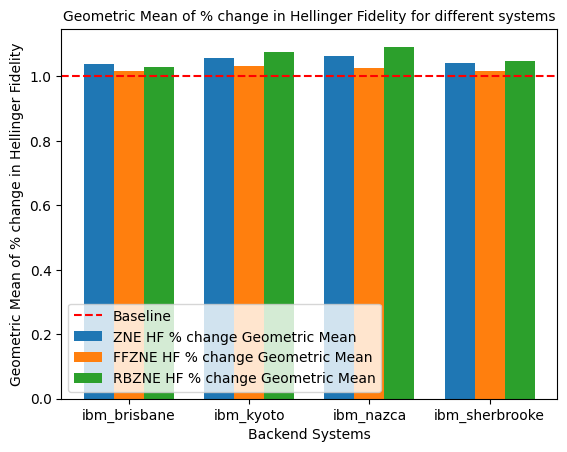

In [327]:
# Data
categories = ['ibm_brisbane', 'ibm_kyoto', 'ibm_nazca', 'ibm_sherbrooke']

zne_hf = get_geometric_means_for_dist('ZNE HF % change',data)  # Values for the first set of bars
ffzne_hf = get_geometric_means_for_dist('FFZNE HF % change',data)  # Values for the second set of bars
rbzne_hf = get_geometric_means_for_dist('RBZNE HF % change',data)  # Values for the third set of bars

# Bar width
bar_width = 0.25

# Positions for the bars
x = np.arange(len(categories))

# Plotting the bars
plt.bar(x, zne_hf, width=bar_width, label='ZNE HF % change Geometric Mean')
plt.bar(x + bar_width, ffzne_hf, width=bar_width, label='FFZNE HF % change Geometric Mean')
plt.bar(x + 2 * bar_width, rbzne_hf, width=bar_width, label='RBZNE HF % change Geometric Mean')

# Draw a horizontal line at y=1
plt.axhline(y=1, color='red', linestyle='--', label='Baseline')

# Adding labels and title
plt.xlabel('Backend Systems')
plt.ylabel('Geometric Mean of % change in Hellinger Fidelity')
plt.title('Geometric Mean of % change in Hellinger Fidelity for different systems', fontsize=10)
plt.xticks(x + bar_width, categories)
plt.legend()

# Show plot
plt.show()


##### Total Variational Distance

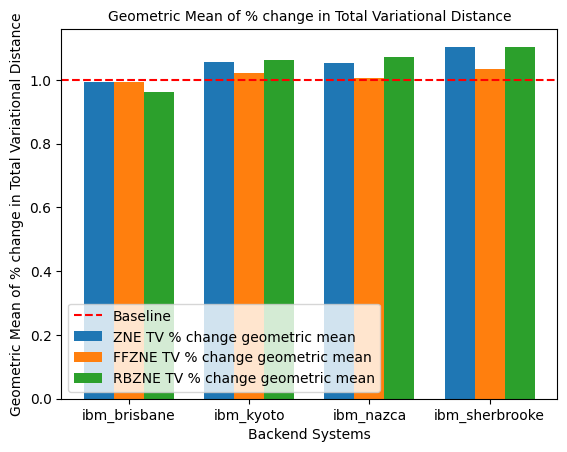

In [298]:
zne_tv = get_geometric_means_for_dist('ZNE TV % change',data)  # Values for the first set of bars
ffzne_tv = get_geometric_means_for_dist('FFZNE TV % change',data)  # Values for the second set of bars
rbzne_tv = get_geometric_means_for_dist('RBZNE TV % change',data)  # Values for the third set of bars

# Bar width
bar_width = 0.25

# Positions for the bars
x = np.arange(len(categories))

# Plotting the bars
plt.bar(x, zne_tv, width=bar_width, label='ZNE TV % change geometric mean')
plt.bar(x + bar_width, ffzne_tv, width=bar_width, label='FFZNE TV % change geometric mean')
plt.bar(x + 2 * bar_width, rbzne_tv, width=bar_width, label='RBZNE TV % change geometric mean')

# Draw a horizontal line at y=1
plt.axhline(y=1, color='red', linestyle='--', label='Baseline')

# Adding labels and title
plt.xlabel('Backend Systems')
plt.ylabel('Geometric Mean of % change in Total Variational Distance')
plt.title('Geometric Mean of % change in Total Variational Distance', fontsize=10)
plt.xticks(x + bar_width, categories)
plt.legend()

# Show plot
plt.show()


#### Geometric mean for each method

In [456]:
from functools import reduce

def get_geometric_mean_for_method(data,dist):

    hf_transformed = list(map(lambda x: 1 + x/100, data[f'{dist} HF % change'])) 
    hf_geometric_mean = reduce(lambda x, y: x*y, hf_transformed)**(1/len(hf_transformed))

    tv_transformed = list(map(lambda x: 1 + x/100, data[f'{dist} TV % change']))
    tv_geometric_mean = reduce(lambda x, y: x*y, tv_transformed)**(1/len(tv_transformed))

    return [hf_geometric_mean, tv_geometric_mean]

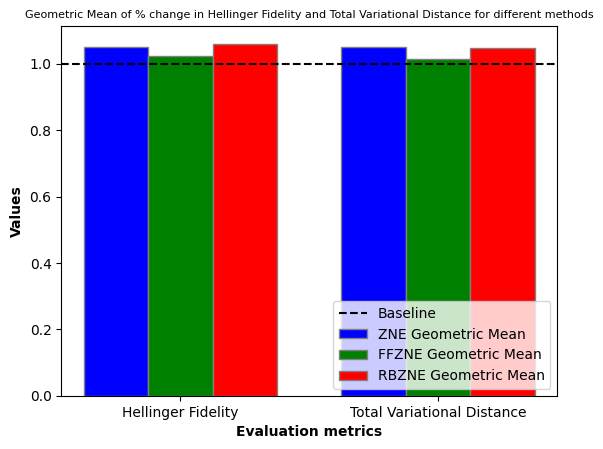

In [457]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Hellinger Fidelity', 'Total Variational Distance']
zne_means = get_geometric_mean_for_method(data,'ZNE')
ffzne_means = get_geometric_mean_for_method(data,'FFZNE')
rbzne_means = get_geometric_mean_for_method(data,'RBZNE')

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bars
plt.bar(r1, zne_means, color='b', width=bar_width, edgecolor='grey', label='ZNE Geometric Mean')
plt.bar(r2, ffzne_means, color='g', width=bar_width, edgecolor='grey', label='FFZNE Geometric Mean')
plt.bar(r3, rbzne_means, color='r', width=bar_width, edgecolor='grey', label='RBZNE Geometric Mean')

# Add horizontal lines at y=1
plt.axhline(y=1, color='black', linestyle='--', label='Baseline')

# Adding labels and title
plt.xlabel('Evaluation metrics', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(categories))], categories)
plt.title('Geometric Mean of % change in Hellinger Fidelity and Total Variational Distance for different methods', fontsize=8)

# Adding legend
plt.legend(loc='lower right')

# Show plot
plt.show()
